In [1]:
# import pandas as pd
# import wandb

# api = wandb.Api()
# entity, project = "frozenwolf", "CL-ASR"
# runs = api.runs(entity + "/" + project)

# summary_list, config_list, name_list = [], [], []
# for run in runs:
#     # .summary contains output keys/values for
#     # metrics such as accuracy.
#     #  We call ._json_dict to omit large files
#     summary_list.append(run.summary._json_dict)

#     # .config contains the hyperparameters.
#     #  We remove special values that start with _.
#     config_list.append({k: v for k, v in run.config.items() if not k.startswith("_")})

#     # .name is the human-readable name of the run.
#     name_list.append(run.name)
#     print(run.name)

# runs_df = pd.DataFrame(
#     {"summary": summary_list, "config": config_list, "name": name_list}
# )

# runs_df


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

n_langs = 9

wandb_desc = pd.read_csv("~/Downloads/wandb_export_2025-05-18T22_08_33.973+05_30.csv")
wandb_desc = wandb_desc[wandb_desc['lang']>=n_langs]
wandb_desc = wandb_desc[wandb_desc['lang']<20]
wandb_desc = wandb_desc[wandb_desc['Tags'] != '1 gpu']

wandb_desc = wandb_desc[~wandb_desc['Name'].isin(['icy-tree-152', 'balmy-wave-159', 'different-sun-162', 'winter-totem-185', 'expert-moon-167', 'copper-pine-202', 'carbonite-admiral-188', 'volcanic-gorge-198'])]

In [3]:
def automated_notes(x):
    mode = str(x['epochs']) + " "
    if "naive" in x['Notes']:
        mode += 'naive'
    elif "lwf" in x['Notes']:
        mode += 'lwf'
        mode += f" kd: {x['cl_config.knowledge_distillation']}"
    elif "ewc" in x['Notes']:
        mode += 'ewc'
        mode += f" lambda: {x['cl_config.e_lambda']}"
    elif "mas" in x['Notes']:
        mode += 'mas'
        mode += f" mas_ctx: {x['cl_config.mas_ctx']}"
        
    return mode

def automated_epoch(x):
    ep = int(x['epochs'])
    return ep


def automated_cl_type(x):
    if "naive" in x['Notes']:
        mode = 'naive'
    elif "lwf" in x['Notes']:
        mode = 'lwf'
    elif "ewc" in x['Notes']:
        mode = 'ewc'
    elif "mas" in x['Notes']:
        mode = 'mas'
        
    return mode

wandb_desc['Notes'] = wandb_desc.apply(automated_notes, axis=1)

wandb_desc['CL_mode'] = wandb_desc.apply(automated_cl_type, axis=1)

wandb_desc['epochs'] = wandb_desc.apply(automated_epoch, axis=1)


In [4]:
wandb_desc.sort_values(['Notes'])
# wandb_desc[['Name', 'ID', 'Notes']]
wandb_desc['Notes'].value_counts()

Notes
10 lwf kd: 0.1         1
10 naive               1
1 mas mas_ctx: 0.3     1
1 lwf kd: 0.1          1
1 lwf kd: 0.5          1
2 mas mas_ctx: 1.0     1
1 naive                1
2 mas mas_ctx: 0.3     1
1 ewc lambda: 10.0     1
2 naive                1
1 mas mas_ctx: 1.0     1
2 ewc lambda: 5.0      1
5 naive                1
5 mas mas_ctx: 0.3     1
2 lwf kd: 0.1          1
5 mas mas_ctx: 1.0     1
5 ewc lambda: 10.0     1
5 lwf kd: 0.5          1
10 mas mas_ctx: 1.0    1
5 ewc lambda: 5.0      1
5 lwf kd: 0.1          1
10 ewc lambda: 10.0    1
10 ewc lambda: 5.0     1
10 lwf kd: 0.5         1
10 mas mas_ctx: 0.3    1
1 ewc lambda: 5.0      1
Name: count, dtype: int64

In [5]:
##ignore run names = icy-tree-152, balmy-wave-159, different-sun-162, winter-totem-185, expert-moon-167, copper-pine-202

wandb_desc[['CL_mode', 'Notes', 'epochs', 'Tags', 'lang', 'Name']].sort_values(['CL_mode', 'epochs'])

CL_mode                Notes  epochs Tags  lang                 Name
23     ewc   1 ewc lambda: 10.0       1  NaN    11        glad-bird-168
33     ewc    1 ewc lambda: 5.0       1  NaN    11    polar-glitter-153
19     ewc    2 ewc lambda: 5.0       2  NaN    11    dulcet-puddle-175
9      ewc    5 ewc lambda: 5.0       5  NaN    11   divine-feather-197
14     ewc   5 ewc lambda: 10.0       5  NaN    11     stellar-surf-183
5      ewc   10 ewc lambda: 5.0      10  NaN    11       azure-hill-201
6      ewc  10 ewc lambda: 10.0      10  NaN    11      young-water-200
29     lwf        1 lwf kd: 0.5       1  NaN    11     stilted-star-161
31     lwf        1 lwf kd: 0.1       1  NaN    11       comic-surf-158
16     lwf        2 lwf kd: 0.1       2  NaN    11  spring-capybara-180
8      lwf        5 lwf kd: 0.1       5  NaN    11       misty-pond-198
13     lwf        5 lwf kd: 0.5       5  NaN    11    stellar-frost-185
0      lwf       10 lwf kd: 0.1      10  NaN     9        peach-sun-207
3      lwf       10 lwf kd: 0.5      10  NaN     9  resilient-sound-204
20     mas   1 mas mas_ctx: 1.0       1  NaN    11   dainty-firefly-174
32     mas   1 mas mas_ctx: 0.3       1  NaN    11     proud-durian-155
25     mas   2 mas mas_ctx: 0.3       2  NaN    11      likely-jazz-166
27     mas   2 mas mas_ctx: 1.0       2  NaN    10      pretty-moon-164
15     mas   5 mas mas_ctx: 1.0       5  NaN    11       fancy-hill-183
17     mas   5 mas mas_ctx: 0.3       5  NaN    11    wobbly-durian-179
2      mas  10 mas mas_ctx: 0.3      10  NaN    11     copper-totem-205
10     mas  10 mas mas_ctx: 1.0      10  NaN    11      desert-wind-194
26   naive              1 naive       1  NaN    11       clean-snow-165
22   naive              2 naive       2  NaN    11      clear-voice-168
18   naive              5 naive       5  NaN    11      tough-shape-176
1    naive             10 naive      10  NaN    11   lilac-capybara-206

In [6]:
wandb_notes = {}
wb_notes_list = []
wandb_notes_info = {}
### Name, Notes column
for i in range(len(wandb_desc)):
    name = wandb_desc.iloc[i]["Name"]
    notes = wandb_desc.iloc[i]["Notes"]
    tags = wandb_desc.iloc[i]["Tags"]
    if wandb_desc.iloc[i]["lang"] < n_langs:
        continue
    if tags == "2 gpu":
        continue
    if notes != "nan":
        wandb_notes[name] = notes.replace('"','')
        wb_notes_list.append(notes.replace('"',''))
        wandb_notes_info[name] = wandb_desc.iloc[i][["CL_mode", "epochs", "lang"]].to_dict()
        
        

wandb_notes, wandb_notes_info

({'peach-sun-207': '10 lwf kd: 0.1',
  'lilac-capybara-206': '10 naive',
  'copper-totem-205': '10 mas mas_ctx: 0.3',
  'resilient-sound-204': '10 lwf kd: 0.5',
  'azure-hill-201': '10 ewc lambda: 5.0',
  'young-water-200': '10 ewc lambda: 10.0',
  'misty-pond-198': '5 lwf kd: 0.1',
  'divine-feather-197': '5 ewc lambda: 5.0',
  'desert-wind-194': '10 mas mas_ctx: 1.0',
  'stellar-frost-185': '5 lwf kd: 0.5',
  'stellar-surf-183': '5 ewc lambda: 10.0',
  'fancy-hill-183': '5 mas mas_ctx: 1.0',
  'spring-capybara-180': '2 lwf kd: 0.1',
  'wobbly-durian-179': '5 mas mas_ctx: 0.3',
  'tough-shape-176': '5 naive',
  'dulcet-puddle-175': '2 ewc lambda: 5.0',
  'dainty-firefly-174': '1 mas mas_ctx: 1.0',
  'clear-voice-168': '2 naive',
  'glad-bird-168': '1 ewc lambda: 10.0',
  'likely-jazz-166': '2 mas mas_ctx: 0.3',
  'clean-snow-165': '1 naive',
  'pretty-moon-164': '2 mas mas_ctx: 1.0',
  'stilted-star-161': '1 lwf kd: 0.5',
  'comic-surf-158': '1 lwf kd: 0.1',
  'proud-durian-155': '1 m

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

wandb_csv = pd.read_csv("~/Downloads/wandb_export_2025-05-18T22_09_44.261+05_30.csv")

In [8]:
wandb_csv

lang  peach-sun-207 - _step  peach-sun-207 - _step__MIN  \
0      0                 9411.0                      9411.0   
1      1                24468.5                     24468.0   
2      2                39532.0                     39531.0   
3      3                54601.5                     54600.0   
4      4                69677.0                     69675.0   
5      5                84758.5                     84756.0   
6      6                99846.0                     99843.0   
7      7               114939.5                    114936.0   
8      8               130039.0                    130035.0   
9      9                    NaN                         NaN   
10    10                    NaN                         NaN   
11    11                    NaN                         NaN   

    peach-sun-207 - _step__MAX  peach-sun-207 - test/perf_bengali_ctc_avg_wer  \
0                       9411.0                                            NaN   
1                      24469.0                                       0.438730   
2                      39533.0                                       1.006639   
3                      54603.0                                       1.004131   
4                      69679.0                                       1.002527   
5                      84761.0                                       1.048047   
6                      99849.0                                       1.015622   
7                     114943.0                                       1.004594   
8                     130043.0                                       1.013315   
9                          NaN                                            NaN   
10                         NaN                                            NaN   
11                         NaN                                            NaN   

    peach-sun-207 - test/perf_bengali_ctc_avg_wer__MIN  \
0                                                 NaN    
1                                            0.438730    
2                                            1.006639    
3                                            1.004131    
4                                            1.002527    
5                                            1.048047    
6                                            1.015622    
7                                            1.004594    
8                                            1.013315    
9                                                 NaN    
10                                                NaN    
11                                                NaN    

    peach-sun-207 - test/perf_bengali_ctc_avg_wer__MAX  \
0                                                 NaN    
1                                            0.438730    
2                                            1.006639    
3                                            1.004131    
4                                            1.002527    
5                                            1.048047    
6                                            1.015622    
7                                            1.004594    
8                                            1.013315    
9                                                 NaN    
10                                                NaN    
11                                                NaN    

    peach-sun-207 - test/perf_bengali_ctc_noisy_wer  \
0                                               NaN   
1                                          0.481076   
2                                          1.010032   
3                                          1.005016   
4                                          1.002736   
5                                          1.047880   
6                                          1.016872   
7                                          1.005016   
8                                          1.015504   
9                                               NaN   
10             

In [9]:
graphs = {}

for col in wandb_csv.columns:
    if col == "lang" or "__MIN" in col or "__MAX" in col:
        continue
    
    run_name = col.split(" - ")[0].rstrip().lstrip()
    
    if run_name not in wandb_notes:
        continue
    graph_name = col.split(" - ")[1].rstrip().lstrip()
    if run_name not in graphs:
        graphs[run_name] = {}
    
    graphs[run_name][graph_name] = wandb_csv[col]

In [10]:
run_name, graphs.keys()

('fallen-feather-123',
 dict_keys(['peach-sun-207', 'lilac-capybara-206', 'copper-totem-205', 'resilient-sound-204', 'azure-hill-201', 'young-water-200', 'misty-pond-198', 'divine-feather-197', 'desert-wind-194', 'stellar-frost-185', 'stellar-surf-183', 'fancy-hill-183', 'spring-capybara-180', 'wobbly-durian-179', 'tough-shape-176', 'dulcet-puddle-175', 'dainty-firefly-174', 'clear-voice-168', 'glad-bird-168', 'likely-jazz-166', 'clean-snow-165', 'pretty-moon-164', 'stilted-star-161', 'comic-surf-158', 'proud-durian-155', 'polar-glitter-153']))

In [11]:
for name in graphs:
    print(name, len(graphs[name]), wandb_notes[name], wandb_notes_info[name])


peach-sun-207 55 10 lwf kd: 0.1 {'CL_mode': 'lwf', 'epochs': 10, 'lang': 9}
lilac-capybara-206 73 10 naive {'CL_mode': 'naive', 'epochs': 10, 'lang': 11}
copper-totem-205 73 10 mas mas_ctx: 0.3 {'CL_mode': 'mas', 'epochs': 10, 'lang': 11}
resilient-sound-204 55 10 lwf kd: 0.5 {'CL_mode': 'lwf', 'epochs': 10, 'lang': 9}
azure-hill-201 67 10 ewc lambda: 5.0 {'CL_mode': 'ewc', 'epochs': 10, 'lang': 11}
young-water-200 73 10 ewc lambda: 10.0 {'CL_mode': 'ewc', 'epochs': 10, 'lang': 11}
misty-pond-198 67 5 lwf kd: 0.1 {'CL_mode': 'lwf', 'epochs': 5, 'lang': 11}
divine-feather-197 73 5 ewc lambda: 5.0 {'CL_mode': 'ewc', 'epochs': 5, 'lang': 11}
desert-wind-194 73 10 mas mas_ctx: 1.0 {'CL_mode': 'mas', 'epochs': 10, 'lang': 11}
stellar-frost-185 67 5 lwf kd: 0.5 {'CL_mode': 'lwf', 'epochs': 5, 'lang': 11}
stellar-surf-183 73 5 ewc lambda: 10.0 {'CL_mode': 'ewc', 'epochs': 5, 'lang': 11}
fancy-hill-183 73 5 mas mas_ctx: 1.0 {'CL_mode': 'mas', 'epochs': 5, 'lang': 11}
spring-capybara-180 67 2 l

In [12]:
wandb_notes_info

cl_selected_runs = {"ewc": {}, "mas": {}, "lwf": {}, "naive": {}}
epoch_selected_runs = {1:{}, 2:{}, 5:{}, 10:{}}

for run_name in wandb_notes_info:
    cl_mode = wandb_notes_info[run_name]['CL_mode']
    cl_selected_runs[cl_mode][run_name] = wandb_notes[run_name]
    epoch = wandb_notes_info[run_name]['epochs']
    epoch_selected_runs[epoch][run_name] = wandb_notes[run_name]
        
cl_selected_runs

# default:
default = ['mas mas_ctx: 0.3', 
          'ewc lambda: 5.0', 
          'lwf kd: 0.1', 
          'naive']

def return_keys_in_list(wandb_notes_selected, keys):
    selected = {}
    for run_name in wandb_notes_selected:
        for k in keys:
            if k in wandb_notes_selected[run_name]:
                selected[run_name] = wandb_notes_selected[run_name]
                break
    return selected

# mas mas_ctx: 0.3
# lwf kd: 0.1
# ewc lambda: 5.0


return_keys_in_list(epoch_selected_runs[10], default)

{'peach-sun-207': '10 lwf kd: 0.1',
 'lilac-capybara-206': '10 naive',
 'copper-totem-205': '10 mas mas_ctx: 0.3',
 'azure-hill-201': '10 ewc lambda: 5.0'}

In [13]:
epoch_selected_runs

{1: {'dainty-firefly-174': '1 mas mas_ctx: 1.0',
  'glad-bird-168': '1 ewc lambda: 10.0',
  'clean-snow-165': '1 naive',
  'stilted-star-161': '1 lwf kd: 0.5',
  'comic-surf-158': '1 lwf kd: 0.1',
  'proud-durian-155': '1 mas mas_ctx: 0.3',
  'polar-glitter-153': '1 ewc lambda: 5.0'},
 2: {'spring-capybara-180': '2 lwf kd: 0.1',
  'dulcet-puddle-175': '2 ewc lambda: 5.0',
  'clear-voice-168': '2 naive',
  'likely-jazz-166': '2 mas mas_ctx: 0.3',
  'pretty-moon-164': '2 mas mas_ctx: 1.0'},
 5: {'misty-pond-198': '5 lwf kd: 0.1',
  'divine-feather-197': '5 ewc lambda: 5.0',
  'stellar-frost-185': '5 lwf kd: 0.5',
  'stellar-surf-183': '5 ewc lambda: 10.0',
  'fancy-hill-183': '5 mas mas_ctx: 1.0',
  'wobbly-durian-179': '5 mas mas_ctx: 0.3',
  'tough-shape-176': '5 naive'},
 10: {'peach-sun-207': '10 lwf kd: 0.1',
  'lilac-capybara-206': '10 naive',
  'copper-totem-205': '10 mas mas_ctx: 0.3',
  'resilient-sound-204': '10 lwf kd: 0.5',
  'azure-hill-201': '10 ewc lambda: 5.0',
  'young-w

In [14]:
temp = ['lwf kd: 0.1', 'naive']
return_keys_in_list(epoch_selected_runs[5], temp), list(return_keys_in_list(epoch_selected_runs[10], temp).keys())

({'misty-pond-198': '5 lwf kd: 0.1', 'tough-shape-176': '5 naive'},
 ['peach-sun-207', 'lilac-capybara-206'])

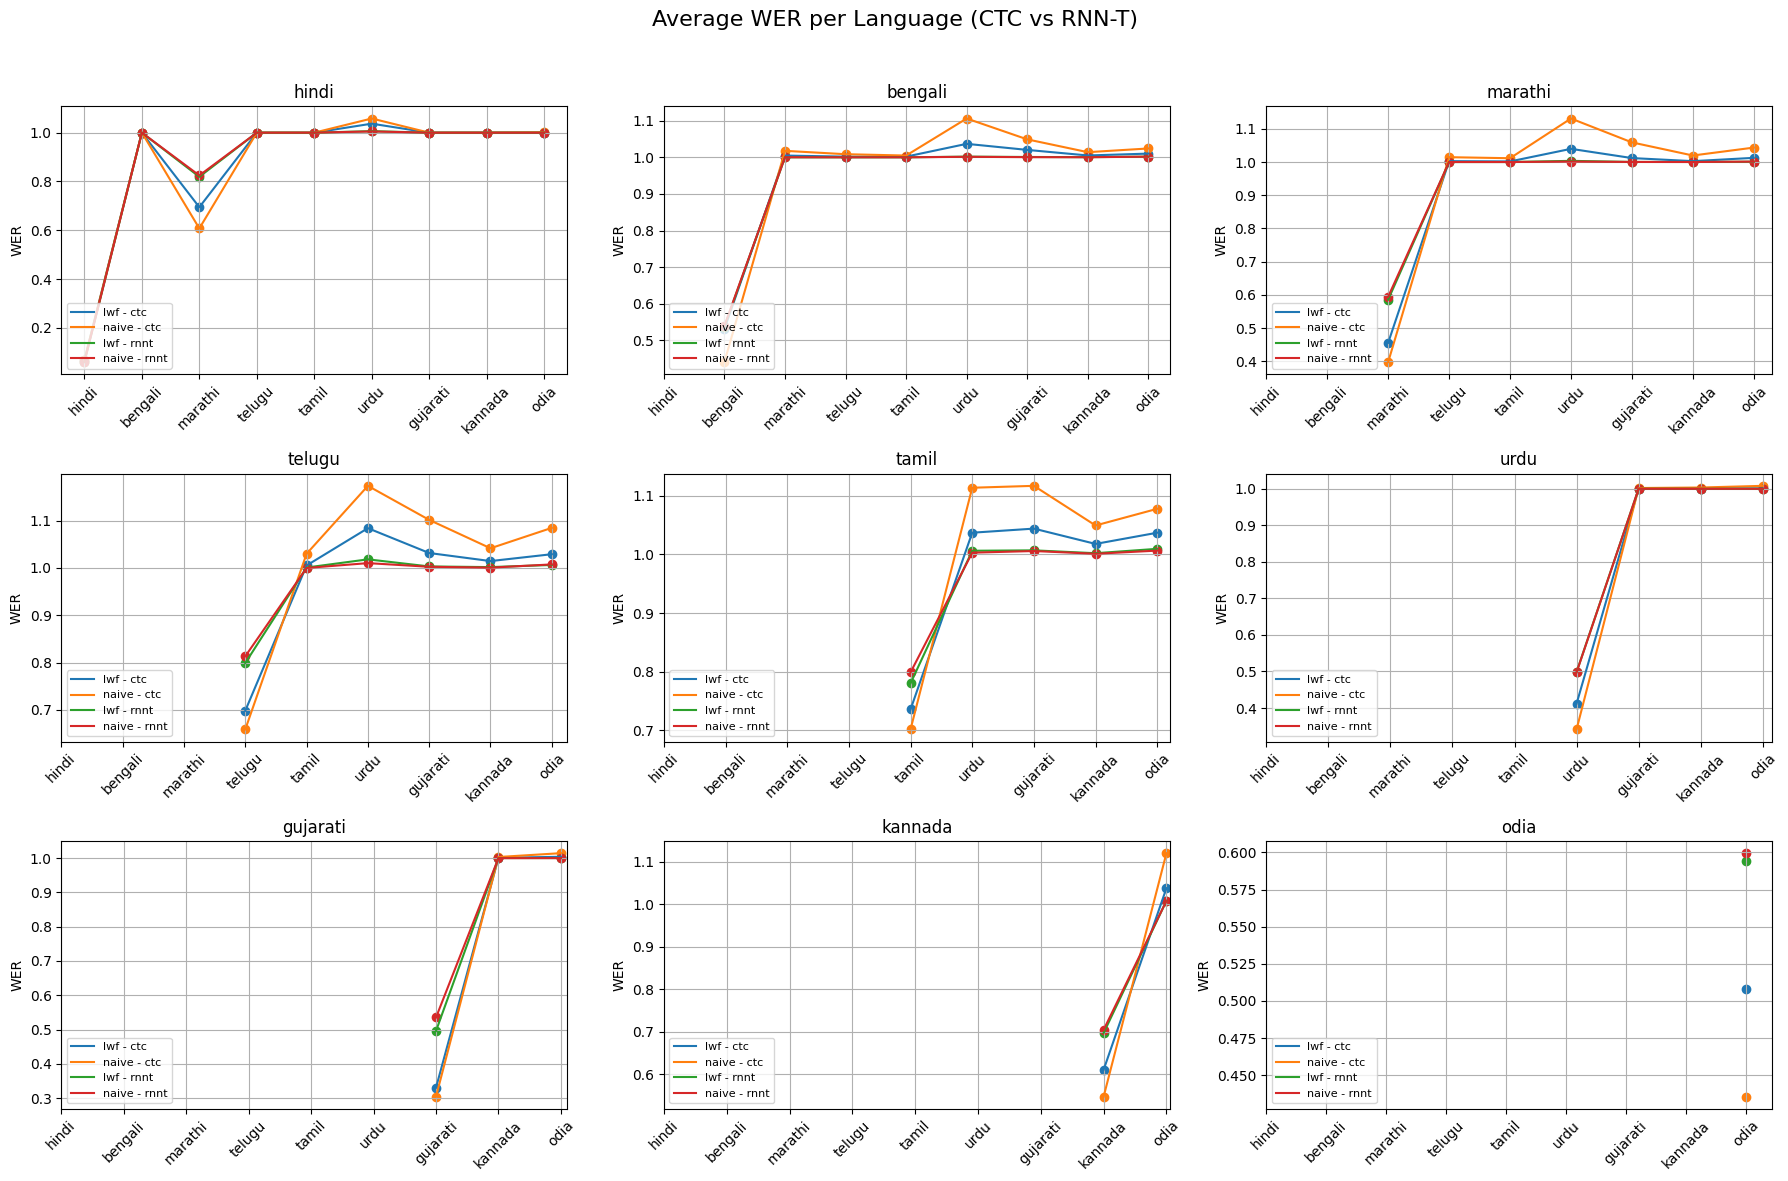

In [19]:
import matplotlib.pyplot as plt

# Assume LANGUAGES and n_langs are defined
LANGUAGES = ['hindi','bengali','marathi','telugu','tamil','urdu','gujarati','kannada','odia','malayalam','punjabi','sanskrit'][:n_langs]
modes = ["ctc", "rnnt"]

# Run names and their labels
run_name1 = 'misty-pond-198'
run_name2 = 'tough-shape-176'

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle("Average WER per Language (CTC vs RNN-T)", fontsize=16)
plt.subplots_adjust(hspace=0.4)

for lang_idx, lang in enumerate(LANGUAGES):
    row, col = divmod(lang_idx, 3)
    ax = axes[row][col]
    
    for mode in modes:
        perf_metric = f"test/perf_{lang}_{mode}_avg_wer"

        if perf_metric not in graphs[run_name1] or perf_metric not in graphs[run_name2]:
            print(f"Skipping {lang} - {mode}")
            continue

        # Plot for run 1
        vals1 = graphs[run_name1][perf_metric][:n_langs]
        ax.plot(range(len(vals1)), vals1, label=f"{wandb_notes[run_name1].split(' ')[1]} - {mode}")
        ax.scatter(range(len(vals1)), vals1)

        # Plot for run 2
        vals2 = graphs[run_name2][perf_metric][:n_langs]
        ax.plot(range(len(vals2)), vals2, label=f"{wandb_notes[run_name2].split(' ')[1]} - {mode}")
        ax.scatter(range(len(vals2)), vals2)

    ax.set_title(f"{lang}")
    ax.set_ylabel("WER")
    ax.set_xticks(range(len(LANGUAGES)))
    ax.set_xticklabels(LANGUAGES, rotation=45)
    ax.grid(True)
    ax.legend(loc='lower left', fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [35]:
def plot_graph(wandb_notes_selected, mode, hide_runname=False):
    
    plt.figure(figsize=(20, 60))

    plt.title("WER vs Language\n\n")
    for lang_idx, lang in enumerate(LANGUAGES):
        for pidx, perf_metric in enumerate(perf_metrics):
            plt.subplot(len(LANGUAGES), 3, lang_idx*3 + 1 + pidx)
            #### spacing between rows
            plt.subplots_adjust(hspace=0.5)
            for run_idx, run_name in enumerate(list(wandb_notes_selected.keys())):
                perf_metric_ = perf_metric.replace("<lang>", lang).replace("<mode>", mode)
                if hide_runname:
                    plt.title(f"{lang} - {perf_metric_} - {wandb_notes_selected[run_name]}")
                else:
                    pm = "normal"
                    if "noisy" in perf_metric_:
                        pm = "noisy"
                    elif "avg" in perf_metric_:
                        pm = "average"
                    plt.title(f"{lang} - {pm}")
                plt.ylabel("WER")
                plt.xticks(range(len(LANGUAGES)), LANGUAGES, rotation=45)
                if perf_metric_ not in graphs[run_name]:
                    print(f"Skipping {run_name} - {perf_metric_}")
                    continue
                plt.plot(range(len(LANGUAGES)), graphs[run_name][perf_metric_][:n_langs], label=wandb_notes_selected[run_name])
                plt.scatter(range(len(LANGUAGES)), graphs[run_name][perf_metric_][:n_langs])
                plt.legend(loc='lower right')
                plt.grid(True)

    plt.show()
    
    
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_graph_plotly(wandb_notes_selected, mode):
    num_langs = len(LANGUAGES)
    num_metrics = len(perf_metrics)

    fig = make_subplots(
        rows=num_langs,
        cols=num_metrics,
        subplot_titles=[
            f"{lang} - {perf_metric.replace('<lang>', lang).replace('<mode>', mode)}"
            for lang in LANGUAGES
            for perf_metric in perf_metrics
        ]
    )

    for lang_idx, lang in enumerate(LANGUAGES):
        for pidx, perf_metric in enumerate(perf_metrics):
            row = lang_idx + 1
            col = pidx + 1
            for run_idx, run_name in enumerate(wandb_notes_selected.keys()):
                perf_metric_ = perf_metric.replace("<lang>", lang).replace("<mode>", mode)
                if perf_metric_ not in graphs[run_name]:
                    print(f"Skipping {run_name} - {perf_metric_}")
                    continue

                y_vals = graphs[run_name][perf_metric_][:n_langs]
                fig.add_trace(go.Scatter(
                    x=LANGUAGES[:n_langs],
                    y=y_vals,
                    mode="lines+markers",
                    name=wandb_notes_selected[run_name],
                    showlegend=(row == 1 and col == 1),
                    legendgroup=wandb_notes_selected[run_name]
                ), row=row, col=col)

    # Increase plot size for readability
    fig.update_layout(
        height=450 * len(LANGUAGES),   # Scale height per language
        width=500 * len(perf_metrics), # Scale width per metric
        title_text="Performance Metrics per Language and Run",
        showlegend=True
    )
    fig.update_xaxes(tickangle=45)
    fig.show()



In [36]:
def calc_scores(wandb_notes_selected, mode, metric="avg"): # metric="avg", "", "noisy"
    bwt_scores = {}
    avg_scores = {}
    min_scores = {}
    max_scores = {}


    for run_name in wandb_notes_selected.keys():
        all_perf = []
        bwt_scores[run_name] = {}
        avg_scores[run_name] = {}
        min_scores[run_name] = {}
        max_scores[run_name] = {}
        for lang in LANGUAGES:
            perf_metric_ = f"test/perf_{lang}_{mode}_{metric}_wer".replace("__","_")  # adjust based on actual format
            if perf_metric_ not in graphs[run_name]:
                continue
            
            perf = graphs[run_name][perf_metric_][:n_langs]  # Length should be equal to len(LANGUAGES)
            all_perf.append(perf.tolist())

            if len(perf) != len(LANGUAGES):
                print(f"Skipping BWT for {run_name} - {perf_metric_}, length mismatch")
                continue
            
            bwt = 0
            avg = 0
            min_ = 1000
            max_ = 0
    
            c = 0
            for i in range(LANGUAGES.index(lang), len(LANGUAGES)):
                avg += perf[i]
                c+=1
                if perf[i] < min_:
                    min_ = perf[i]     
                if perf[i] > max_:
                    max_ = perf[i]



            avg_scores[run_name][lang] = avg/c
            min_scores[run_name][lang] = min_
            max_scores[run_name][lang] = max_

        
        for t, (lang, perf) in enumerate(zip(LANGUAGES, all_perf)):
            # print(t, lang, perf)
            bwt_scores[run_name][lang] = 0
            # print("LANG", lang, perf)
            for prev_lang in range(t):
                bwt_scores[run_name][lang] += all_perf[prev_lang][prev_lang] - all_perf[prev_lang][t]
                # print(all_perf[prev_lang][prev_lang], all_perf[prev_lang][t])
            bwt_scores[run_name][lang] /= max(t, 1)
            
            # print(lang, bwt_scores[run_name][lang])
            # print("---------")
            
    return bwt_scores, avg_scores, min_scores, max_scores

# calc_scores(cl_selected_runs["ewc"], "rnnt", "avg")


In [37]:
# def plot_stats(wandb_notes_selected, mode):
#     bwt_scores, avg_scores, min_scores, max_scores = calc_scores(wandb_notes_selected, mode)

#     import numpy as np
#     plt.figure(figsize=(12, 5))
#     for run_idx, (run_name, desc) in enumerate(wandb_notes_selected.items()):
#         langs = list(avg_scores[run_name].keys())
#         scores = [avg_scores[run_name][lang] for lang in langs]
#         plt.plot(langs, scores, marker='o', label=desc)

#     plt.title("Avg WER")
#     plt.xlabel("Language")
#     plt.ylabel("Avg Score (Lesss = Improvement)")
#     plt.xticks(rotation=45)
#     plt.grid(True)
#     plt.legend()
#     plt.tight_layout()
#     plt.show()


#     plt.figure(figsize=(12, 5))
#     langs = list(next(iter(avg_scores.values())).keys())  # Assume all runs have same langs
#     x = np.arange(len(langs))  # the label locations
#     width = 0.8 / len(wandb_notes_selected)  # total width divided among bars

#     for i, (run_name, desc) in enumerate(wandb_notes_selected.items()):
#         scores = [avg_scores[run_name][lang] for lang in langs]
#         plt.bar(x + i * width, scores, width=width, label=desc)

#     plt.title("Avg WER")
#     plt.xlabel("Language")
#     plt.ylabel("Avg Score (Less = Better)")
#     plt.xticks(x + width * (len(wandb_notes_selected) - 1) / 2, langs, rotation=45)
#     plt.grid(True, axis='y')
#     plt.legend()
#     plt.tight_layout()
#     plt.show()


#     plt.figure(figsize=(12, 5))

#     langs = list(next(iter(min_scores.values())).keys())  # Assume all runs have same langs
#     x = np.arange(len(langs))  # the label locations
#     width = 0.8 / len(wandb_notes_selected)  # total width divided among bars

#     for i, (run_name, desc) in enumerate(wandb_notes_selected.items()):
#         scores = [min_scores[run_name][lang] for lang in langs]
#         plt.bar(x + i * width, scores, width=width, label=desc)

#     plt.title("Min Score")
#     plt.xlabel("Language")
#     plt.ylabel("WER (Less = Better)")
#     plt.xticks(x + width * (len(wandb_notes_selected) - 1) / 2, langs, rotation=45)
#     plt.grid(True, axis='y')
#     plt.legend()
#     plt.tight_layout()
#     plt.show()


#     plt.figure(figsize=(12, 5))

#     langs = list(next(iter(max_scores.values())).keys())  # Assume all runs have same langs
#     x = np.arange(len(langs))  # the label locations
#     width = 0.8 / len(wandb_notes_selected)  # total width divided among bars

#     for i, (run_name, desc) in enumerate(wandb_notes_selected.items()):
#         scores = [max_scores[run_name][lang] for lang in langs]
#         plt.bar(x + i * width, scores, width=width, label=desc)

#     plt.title("Max WER")
#     plt.xlabel("Language")
#     plt.ylabel("WER (Less = Better)")
#     plt.xticks(x + width * (len(wandb_notes_selected) - 1) / 2, langs, rotation=45)
#     plt.grid(True, axis='y')
#     plt.legend()
#     plt.tight_layout()
#     plt.show()


#     plt.figure(figsize=(12, 5))
#     for run_idx, (run_name, desc) in enumerate(wandb_notes_selected.items()):
#         langs = list(bwt_scores[run_name].keys())
#         scores = [bwt_scores[run_name][lang] for lang in langs]
#         plt.plot(langs, scores, marker='o', label=desc)

#     plt.title("Backward Transfer (WER)")
#     plt.xlabel("Language")
#     plt.ylabel("BWT (Positive = Improvement)")
#     plt.xticks(rotation=45)
#     plt.grid(True)
#     plt.legend()
#     plt.tight_layout()
#     plt.show()

#     plt.figure(figsize=(12, 5))

#     langs = list(next(iter(bwt_scores.values())).keys())  # Assume all runs have same langs
#     x = np.arange(len(langs))  # label locations
#     width = 0.8 / len(wandb_notes_selected)  # width per bar

#     for i, (run_name, desc) in enumerate(wandb_notes_selected.items()):
#         scores = [bwt_scores[run_name][lang] for lang in langs]
#         plt.bar(x + i * width, scores, width=width, label=desc)

#     plt.title("Backward Transfer (WER)")
#     plt.xlabel("Language")
#     plt.ylabel("BWT (Positive = Improvement)")
#     plt.xticks(x + width * (len(wandb_notes_selected) - 1) / 2, langs, rotation=45)
#     plt.grid(True, axis='y')
#     plt.legend()
#     plt.tight_layout()
#     plt.show()



In [38]:

def rename_wandb_notes(wandb_notes_selected):
    for k,v in list(wandb_notes_selected.items()):
        del wandb_notes_selected[k]
        v = v.split(" ")[1]
        wandb_notes_selected[k] = v
        
    return wandb_notes_selected

def remove_epoch(wandb_notes_selected):
    for k,v in list(wandb_notes_selected.items()):
        del wandb_notes_selected[k]
        v = ' '.join(v.split(" ")[1:])
        wandb_notes_selected[k] = v
        
    return wandb_notes_selected

## rename neatly

Selected runs for {'misty-pond-198': 'lwf', 'divine-feather-197': 'ewc', 'wobbly-durian-179': 'mas', 'tough-shape-176': 'naive'}


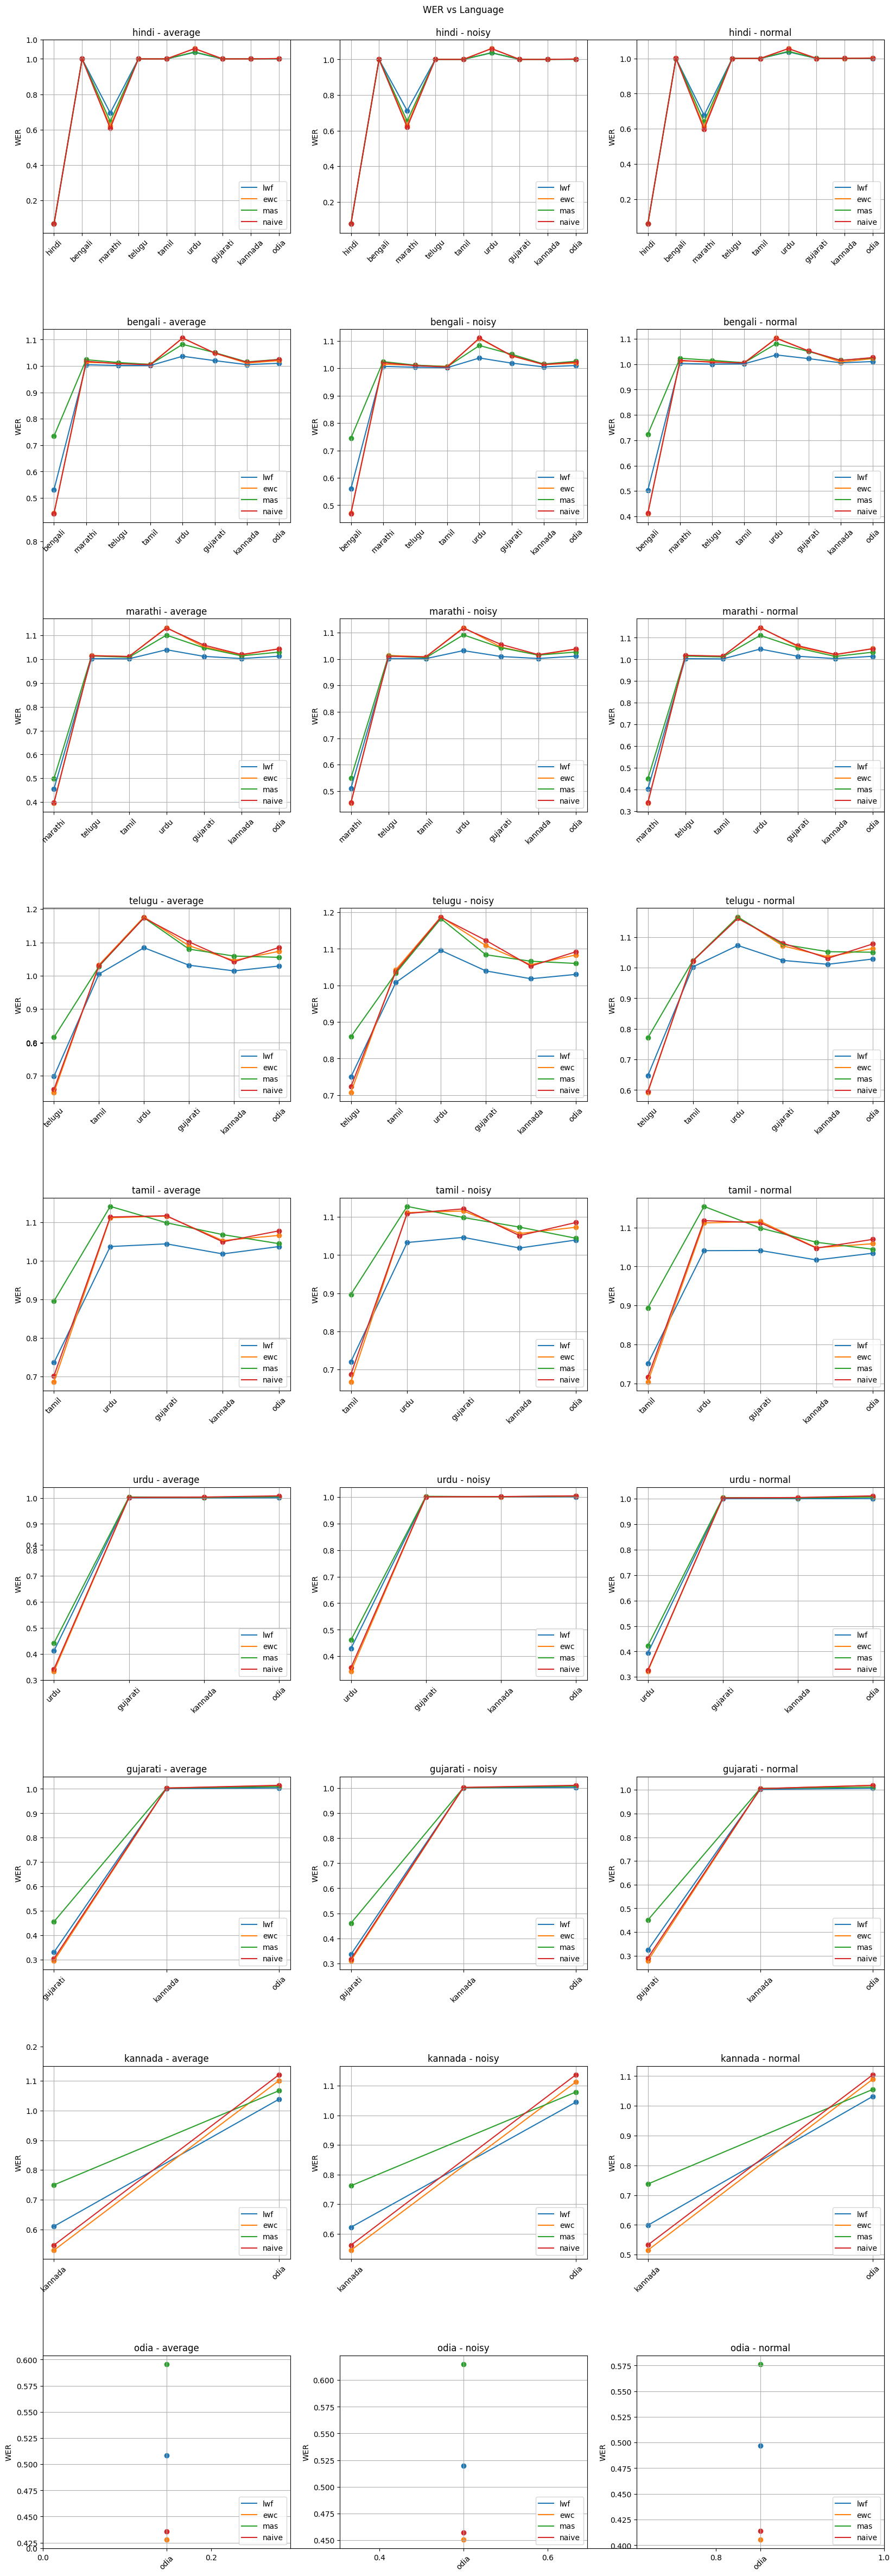

In [39]:
import numpy as np
import matplotlib.pyplot as plt


wandb_notes_selected = return_keys_in_list(epoch_selected_runs[5], default)
mode = "ctc"

wandb_notes_selected = rename_wandb_notes(wandb_notes_selected)
print("Selected runs for", wandb_notes_selected)
plot_graph(wandb_notes_selected, mode)

In [21]:
# plot_graph_plotly(wandb_notes_selected, mode)

In [40]:


import numpy as np
import matplotlib.pyplot as plt

def updated_plot_stats(wandb_notes_selected, mode, metrics = ["avg", "", "noisy"]):
    metric_titles = {"avg": "Avg", "": "Normal", "noisy": "Noisy"}

    langs = list(next(iter(calc_scores(wandb_notes_selected, mode, "avg")[1].values())).keys())
    x = np.arange(len(langs))

    # --- 1. WER Line Plot ---
    fig, axs = plt.subplots(1, len(metrics), figsize=(18, 5), sharey=True)
    for col_idx, metric in enumerate(metrics):
        _, avg_scores, _, _ = calc_scores(wandb_notes_selected, mode, metric)
        ax = axs[col_idx]
        for run_name, desc in wandb_notes_selected.items():
            scores = [avg_scores[run_name][lang] for lang in langs]
            ax.plot(langs, scores, marker='o', label=desc)
        ax.set_title(f"{metric_titles[metric]} WER")
        ax.set_xlabel("Language")
        ax.set_ylabel("WER (Lower = Better)")
        ax.tick_params(labelleft=True)
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True)
        if col_idx == 0:
            ax.legend()
    plt.suptitle("WER", fontsize=14)
    plt.tight_layout()
    plt.show()

    # --- 2. Shaded Min/Max Area Plot ---
    fig, axs = plt.subplots(1, len(metrics), figsize=(18, 5), sharey=True)
    for col_idx, metric in enumerate(metrics):
        _, avg_scores, min_scores, max_scores = calc_scores(wandb_notes_selected, mode, metric)
        ax = axs[col_idx]
        for run_name, desc in wandb_notes_selected.items():
            avg_vals = [avg_scores[run_name][lang] for lang in langs]
            min_vals = [min_scores[run_name][lang] for lang in langs]
            max_vals = [max_scores[run_name][lang] for lang in langs]
            ax.plot(x, avg_vals, marker='o', label=desc)
            ax.fill_between(x, min_vals, max_vals, alpha=0.2)
        ax.set_title(f"{metric_titles[metric]} WER with Shading")
        ax.set_xlabel("Language")
        ax.set_xticks(x)
        ax.tick_params(labelleft=True)
        ax.set_xticklabels(langs, rotation=45)
        ax.grid(True)
        if col_idx == 0:
            ax.set_ylabel("WER")
            ax.legend()
    plt.suptitle("WER Min/Max", fontsize=14)
    plt.tight_layout()
    plt.show()

    # --- 3. Error Bar Plot ---
    fig, axs = plt.subplots(1, len(metrics), figsize=(18, 5), sharey=True)
    for col_idx, metric in enumerate(metrics):
        _, avg_scores, min_scores, max_scores = calc_scores(wandb_notes_selected, mode, metric)
        ax = axs[col_idx]
        for i, (run_name, desc) in enumerate(wandb_notes_selected.items()):
            avg_vals = np.array([avg_scores[run_name][lang] for lang in langs])
            min_vals = np.array([min_scores[run_name][lang] for lang in langs])
            max_vals = np.array([max_scores[run_name][lang] for lang in langs])
            lower = avg_vals - min_vals
            upper = max_vals - avg_vals
            ax.errorbar(x + i * 0.1, avg_vals, yerr=[lower, upper], fmt='o-', capsize=5, label=desc)
        ax.set_title(f"{metric_titles[metric]} WER Error Bars")
        ax.set_xlabel("Language")
        ax.set_xticks(x)
        ax.tick_params(labelleft=True)
        ax.set_xticklabels(langs, rotation=45)
        ax.grid(True)
        if col_idx == 0:
            ax.set_ylabel("WER")
            ax.legend()
    plt.suptitle("WER Min–Avg–Max", fontsize=14)
    plt.tight_layout()
    plt.show()

    # --- 4. BWT Plot ---
    fig, axs = plt.subplots(1, len(metrics), figsize=(18, 5), sharey=True)
    for col_idx, metric in enumerate(metrics):
        bwt_scores, _, _, _ = calc_scores(wandb_notes_selected, mode, metric)
        ax = axs[col_idx]
        for run_name, desc in wandb_notes_selected.items():
            scores = [bwt_scores[run_name][lang] for lang in langs]
            ax.plot(x, scores, marker='o', label=desc)
        ax.set_title(f"{metric_titles[metric]} BWT")
        ax.set_xlabel("Language")
        ax.set_xticks(x)
        ax.tick_params(labelleft=True)
        ax.set_xticklabels(langs, rotation=45)
        ax.grid(True)
        if col_idx == 0:
            ax.set_ylabel("BWT")
            ax.legend()
    plt.suptitle("Backward Transfer (BWT)", fontsize=14)
    plt.tight_layout()
    plt.show()

    # --- 5. Box Plots: WER per Segment, Grouped by Run, with Different Colors ---
    import matplotlib.cm as cm
    import matplotlib.colors as mcolors

    fig, axs = plt.subplots(1, len(metrics), figsize=(18, 5))
    for col_idx, metric in enumerate(metrics):
        _, avg_scores, _, _ = calc_scores(wandb_notes_selected, mode, metric)
        ax = axs[col_idx]

        n_langs = len(langs)
        segments = [n_langs // 3, 2 * n_langs // 3, n_langs]
        segment_labels = [f"{seg}" for seg in segments]
        run_names = list(wandb_notes_selected.keys())
        num_runs = len(run_names)

        # Generate unique colors for each run
        color_map = cm.get_cmap('tab10', num_runs)
        run_colors = [mcolors.to_hex(color_map(i)) for i in range(num_runs)]

        width = 0.2
        positions = []
        all_data = []
        box_colors = []

        for seg_idx, seg in enumerate(segments):
            for run_idx, run_name in enumerate(run_names):
                wer_values = [avg_scores[run_name][lang] for lang in langs[:seg]]
                all_data.append(wer_values)
                positions.append(seg_idx * (num_runs + 1) + run_idx)
                box_colors.append(run_colors[run_idx])

        # Create boxplot
        box = ax.boxplot(
            all_data,
            positions=positions,
            widths=0.6,
            patch_artist=True,
            showmeans=True,
            boxprops=dict(color='black'),
            meanprops=dict(marker='o', markerfacecolor='black', markeredgecolor='black'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(marker='x', color='gray', alpha=0.5),
        )

        # Apply colors per box
        for patch, color in zip(box['boxes'], box_colors):
            patch.set_facecolor(color)

        # X-axis labels at group centers
        group_centers = [(i * (num_runs + 1) + (num_runs - 1) / 2) for i in range(len(segments))]
        ax.set_xticks(group_centers)
        ax.set_xticklabels(segment_labels)
        ax.set_title(f"{metric_titles[metric]} WER Box Plot")
        ax.set_xlabel("Language Segment")
        ax.set_ylabel("WER")
        ax.grid(True)

        # Legend for runs
        legend_handles = [
            plt.Line2D([], [], color=run_colors[i], marker='s', linestyle='None', label=wandb_notes_selected[run])
            for i, run in enumerate(run_names)
        ]
        ax.legend(legend_handles, [wandb_notes_selected[run] for run in run_names], loc='lower left')

    plt.suptitle("WER Box Plot per Segment (Grouped by Run, Colored)", fontsize=14)
    plt.tight_layout()
    plt.show()





In [41]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def updated_plot_stats_plotly(wandb_notes_selected, mode, metrics=["avg", "", "noisy"]):
    metric_titles = {"avg": "Avg", "": "Normal", "noisy": "Noisy"}
    langs = list(next(iter(calc_scores(wandb_notes_selected, mode, "avg")[1].values())).keys())
    x = np.arange(len(langs))

    # --- 1. WER Line Plot ---
    fig1 = make_subplots(rows=1, cols=len(metrics), shared_yaxes=True, subplot_titles=[f"{metric_titles[m]} WER" for m in metrics])
    for col_idx, metric in enumerate(metrics):
        _, avg_scores, _, _ = calc_scores(wandb_notes_selected, mode, metric)
        for run_name, desc in wandb_notes_selected.items():
            scores = [avg_scores[run_name][lang] for lang in langs]
            fig1.add_trace(go.Scatter(
                x=langs,
                y=scores,
                mode='lines+markers',
                name=desc,
                showlegend=(col_idx == 0),
                legendgroup=desc,
            ), row=1, col=col_idx+1)
    fig1.update_layout(title="WER Line Plot Across Metric Types", height=500, width=1800 ,showlegend=True)

    # --- 2. Shaded Min/Max Area Plot ---
    fig2 = make_subplots(rows=1, cols=len(metrics), shared_yaxes=True, subplot_titles=[f"{metric_titles[m]} WER with Shading" for m in metrics])
    for col_idx, metric in enumerate(metrics):
        _, avg_scores, min_scores, max_scores = calc_scores(wandb_notes_selected, mode, metric)
        for run_name, desc in wandb_notes_selected.items():
            avg_vals = [avg_scores[run_name][lang] for lang in langs]
            min_vals = [min_scores[run_name][lang] for lang in langs]
            max_vals = [max_scores[run_name][lang] for lang in langs]
            fig2.add_trace(go.Scatter(
                x=langs,
                y=avg_vals,
                mode='lines+markers',
                name=desc,
                showlegend=(col_idx == 0),
                legendgroup=desc
            ), row=1, col=col_idx+1)
            fig2.add_trace(go.Scatter(
                x=langs + langs[::-1],
                y=max_vals + min_vals[::-1],
                fill='toself',
                fillcolor='rgba(0,100,80,0.2)',
                line=dict(color='rgba(255,255,255,0)'),
                hoverinfo="skip",
                showlegend=False,
                legendgroup=desc
            ), row=1, col=col_idx+1)
    fig2.update_layout(title="WER Min/Max Shading Across Metric Types", height=500, width=1800 ,showlegend=True)

    # --- 3. Error Bar Plot ---
    fig3 = make_subplots(rows=1, cols=len(metrics), shared_yaxes=True, subplot_titles=[f"{metric_titles[m]} WER Error Bars" for m in metrics])
    for col_idx, metric in enumerate(metrics):
        _, avg_scores, min_scores, max_scores = calc_scores(wandb_notes_selected, mode, metric)
        for i, (run_name, desc) in enumerate(wandb_notes_selected.items()):
            avg_vals = np.array([avg_scores[run_name][lang] for lang in langs])
            min_vals = np.array([min_scores[run_name][lang] for lang in langs])
            max_vals = np.array([max_scores[run_name][lang] for lang in langs])
            lower = avg_vals - min_vals
            upper = max_vals - avg_vals
            fig3.add_trace(go.Scatter(
                x=langs,
                y=avg_vals,
                error_y=dict(type='data', symmetric=False, array=upper, arrayminus=lower, visible=True),
                mode='lines+markers',
                name=desc,
                showlegend=(col_idx == 0),
                legendgroup=desc
            ), row=1, col=col_idx+1)
    fig3.update_layout(title="WER Min–Avg–Max Error Bars Across Metric Types", height=500, width=1800 ,showlegend=True)

    # --- 4. BWT Plot ---
    fig4 = make_subplots(rows=1, cols=len(metrics), shared_yaxes=True, subplot_titles=[f"{metric_titles[m]} BWT" for m in metrics])
    for col_idx, metric in enumerate(metrics):
        bwt_scores, _, _, _ = calc_scores(wandb_notes_selected, mode, metric)
        for run_name, desc in wandb_notes_selected.items():
            scores = [bwt_scores[run_name][lang] for lang in langs]
            fig4.add_trace(go.Scatter(
                x=langs,
                y=scores,
                mode='lines+markers',
                name=desc,
                showlegend=(col_idx == 0),
                legendgroup=desc
            ), row=1, col=col_idx+1)
    fig4.update_layout(title="Backward Transfer (BWT) Across Metric Types", height=500, width=1800 ,showlegend=True)

    # Show all figures
    fig1.show()
    fig2.show()
    fig3.show()
    fig4.show()


    # --- 5. Proper Box Plot by Segment and Run ---
    # --- 5. Box Plot with Fixed Width & Proper Spacing ---
    import plotly.express as px
    
    # Generate consistent colors for runs
    run_names = list(wandb_notes_selected.keys())
    colors = px.colors.qualitative.Plotly  # or any other palette you like
    color_map = {run: colors[i % len(colors)] for i, run in enumerate(run_names)}
    
    # --- Box Plot with consistent colors ---
    fig5 = make_subplots(
        rows=1,
        cols=len(metrics),
        shared_yaxes=True,
        subplot_titles=[f"{metric_titles[m]} WER Box Plot by Segment & Run" for m in metrics]
    )
    
    n_langs = len(langs)
    segments = [n_langs // 3, 2 * n_langs // 3, n_langs]
    segment_labels = [f"0–{seg}" for seg in segments]
    
    for col_idx, metric in enumerate(metrics):
        _, avg_scores, _, _ = calc_scores(wandb_notes_selected, mode, metric)
    
        for seg_idx, seg in enumerate(segments):
            segment_name = segment_labels[seg_idx]
    
            for run_idx, run_name in enumerate(run_names):
                desc = wandb_notes_selected[run_name]
                wer_vals = [avg_scores[run_name][lang] for lang in langs[:seg]]
                x_label = f"{segment_name}<br>{desc}"
    
                fig5.add_trace(go.Box(
                    y=wer_vals,
                    x=[x_label] * len(wer_vals),
                    name=desc,
                    boxmean='sd',
                    legendgroup=desc,
                    showlegend=(seg_idx == 0 and col_idx == 0),
                    marker_color=color_map[run_name],  # fixed color here
                    width=0.4,
                ), row=1, col=col_idx + 1)
    
        fig5.update_xaxes(
            title_text="Segment + Run",
            tickangle=45,
            type='category',
            row=1, col=col_idx + 1
        )
    
    fig5.update_layout(
        title="WER Box Plot per Segment and Run (Fixed Colors)",
        height=600,
        width=1800,
        boxmode='group',
        showlegend=True
    )
    
    fig5.show()
    
    
    
    
    

In [46]:
# # wandb_notes_selected = cl_selected_runs["ewc"]

# temp = ["lwf",  "naive"]
# wandb_notes_selected = return_keys_in_list(epoch_selected_runs[5], temp)

# mode = "ctc"
# updated_plot_stats_plotly(wandb_notes_selected, mode, metrics = ["avg", "", "noisy"])

default

['mas mas_ctx: 0.3', 'ewc lambda: 5.0', 'lwf kd: 0.1', 'naive']

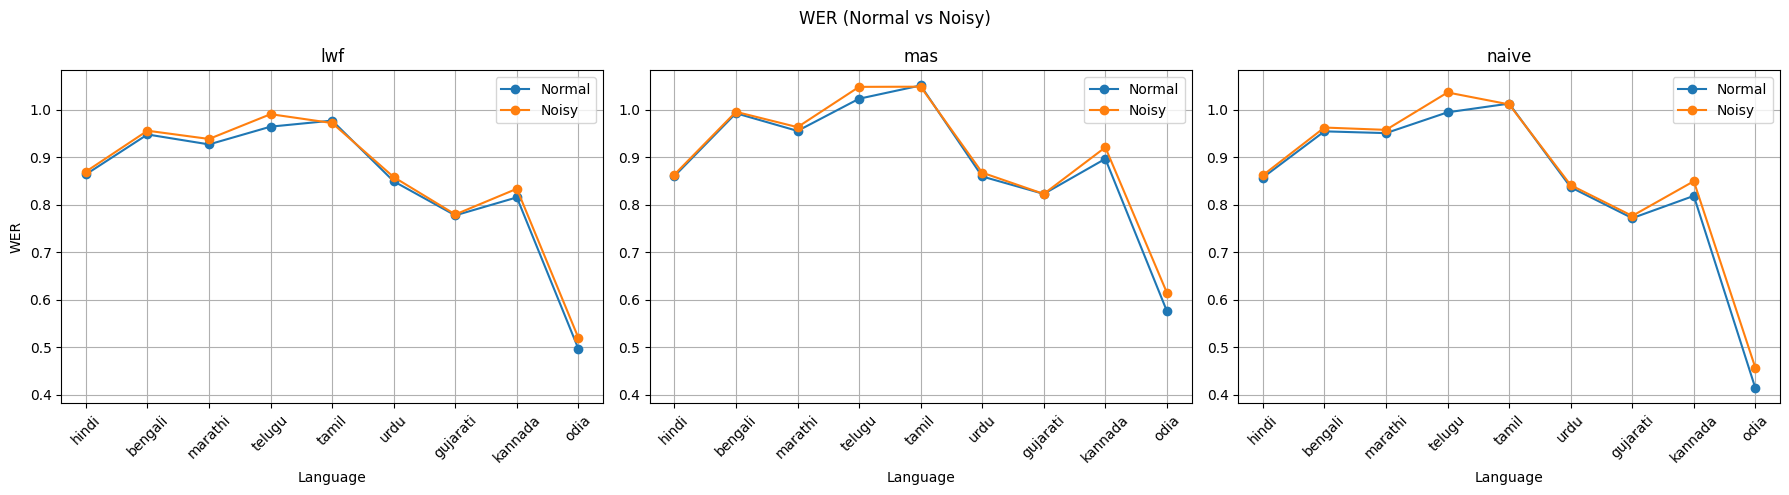

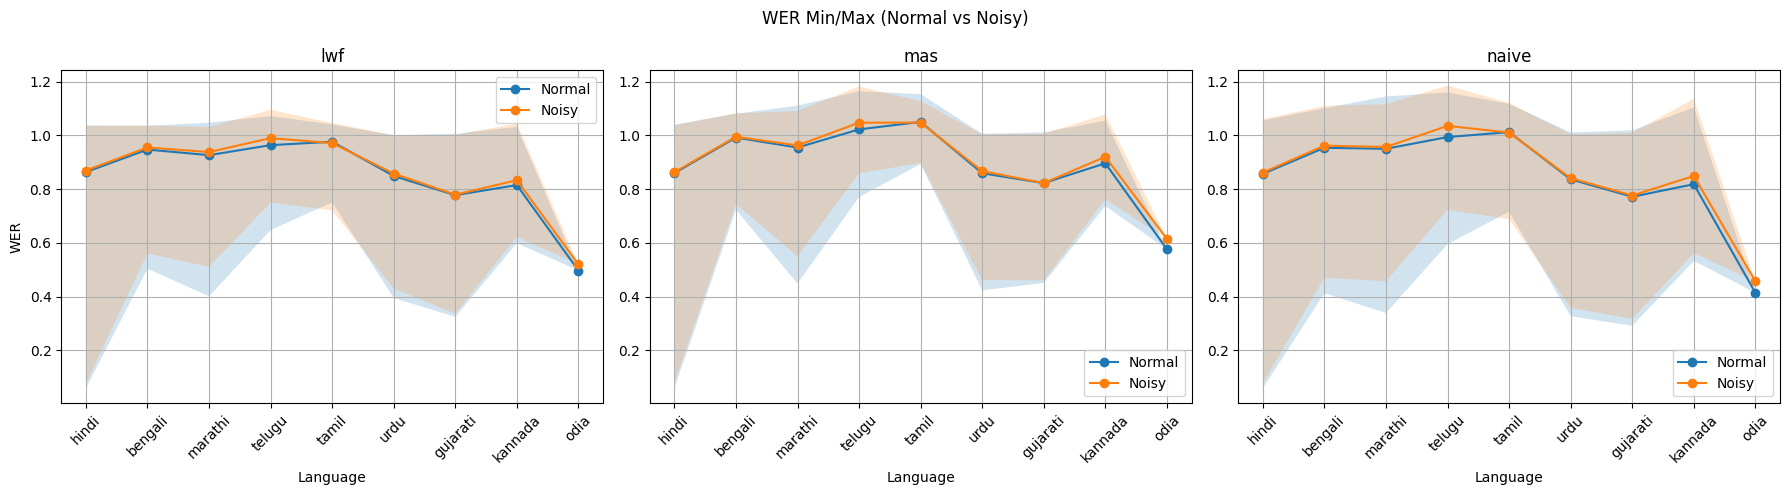

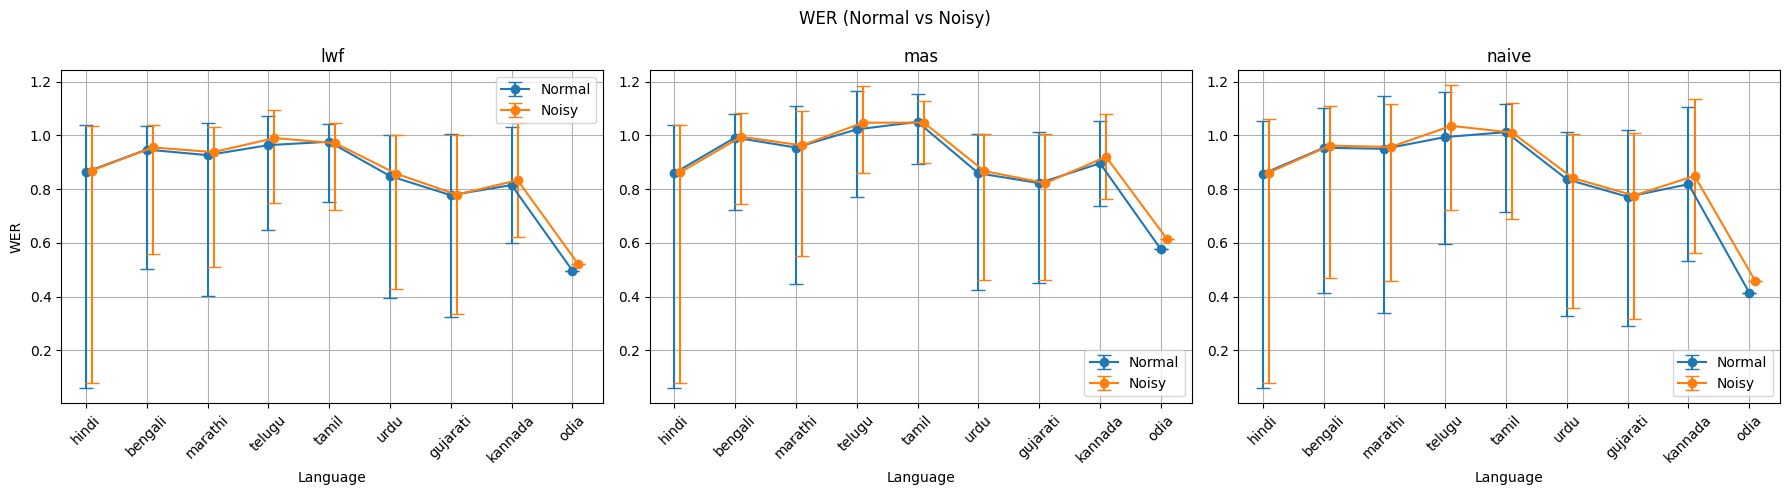

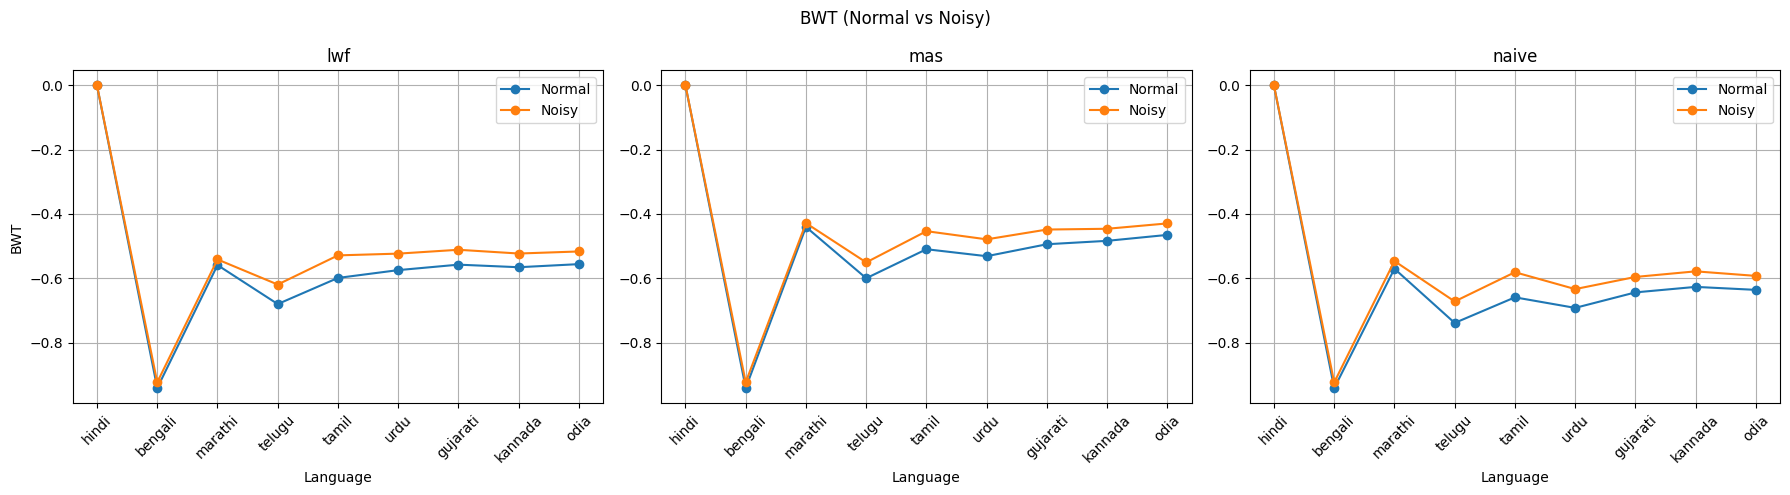

/tmp/ipykernel_7451/2985217412.py:122: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab10', len(metrics))


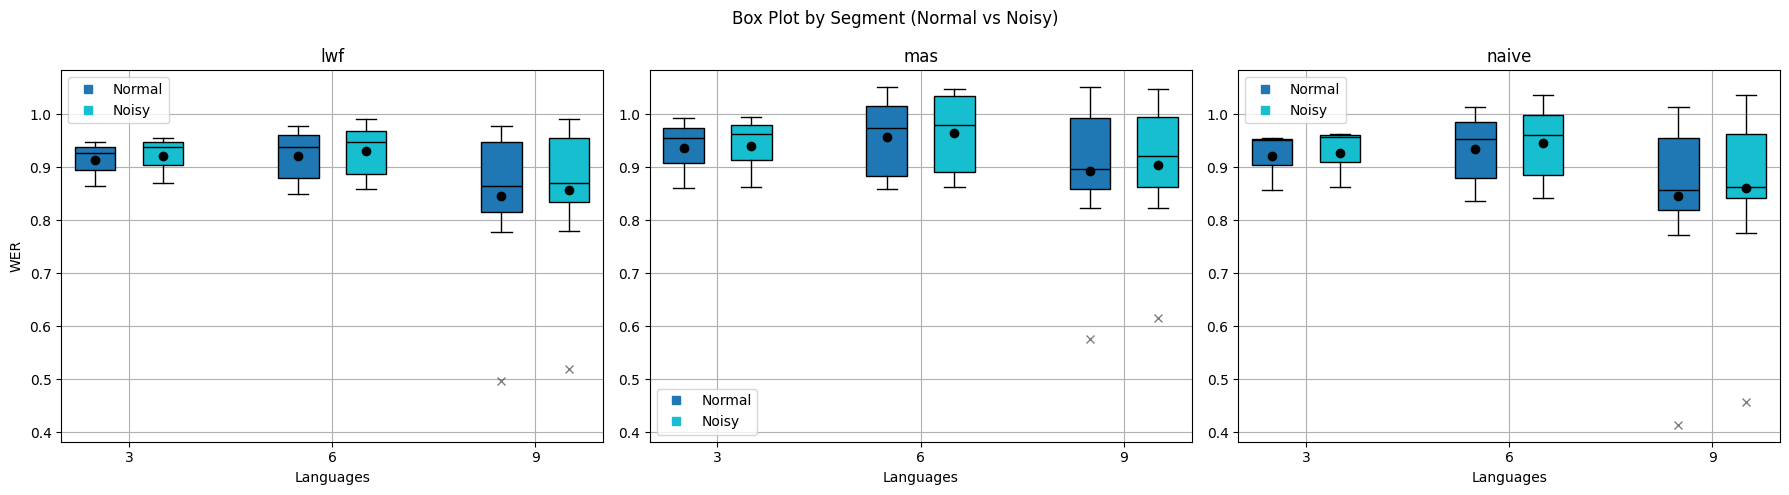

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

def enforce_shared_ylim(axs):
    axs_iter = axs if isinstance(axs, (list, np.ndarray)) else [axs]
    ymins, ymaxs = [], []
    for ax in axs_iter:
        ymin, ymax = ax.get_ylim()
        ymins.append(ymin)
        ymaxs.append(ymax)
    common_ymin = min(ymins)
    common_ymax = max(ymaxs)
    for ax in axs_iter:
        ax.set_ylim(common_ymin, common_ymax)

def updated_plot_stats_multi(wandb_notes_selected, mode):
    metrics = ["", "noisy"]
    metric_titles = {"": "Normal", "noisy": "Noisy"}
    run_names = list(wandb_notes_selected.keys())
    num_runs = len(run_names)
    langs = list(calc_scores(wandb_notes_selected, mode, "avg")[1][run_names[0]].keys())
    x = np.arange(len(langs))

    # --- 1. WER Line Plot ---
    fig, axs = plt.subplots(1, num_runs, figsize=(6 * num_runs, 5), sharey=True)
    for idx, run_name in enumerate(run_names):
        ax = axs[idx] if num_runs > 1 else axs
        desc = wandb_notes_selected[run_name]
        for metric in metrics:
            _, avg_scores, _, _ = calc_scores({run_name: desc}, mode, metric)
            scores = [avg_scores[run_name][lang] for lang in langs]
            ax.plot(langs, scores, marker='o', label=metric_titles[metric])
        ax.set_title(desc)
        ax.set_xlabel("Language")
        ax.tick_params(labelleft=True)
        ax.set_ylabel("WER" if idx == 0 else "")
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True)
        ax.legend()
    enforce_shared_ylim(axs)
    fig.suptitle("WER (Normal vs Noisy)")
    plt.tight_layout()
    plt.show()

    # --- 2. Shaded Min/Max Plot ---
    fig, axs = plt.subplots(1, num_runs, figsize=(6 * num_runs, 5), sharey=True)
    for idx, run_name in enumerate(run_names):
        ax = axs[idx] if num_runs > 1 else axs
        desc = wandb_notes_selected[run_name]
        for metric in metrics:
            _, avg_scores, min_scores, max_scores = calc_scores({run_name: desc}, mode, metric)
            avg_vals = [avg_scores[run_name][lang] for lang in langs]
            min_vals = [min_scores[run_name][lang] for lang in langs]
            max_vals = [max_scores[run_name][lang] for lang in langs]
            ax.plot(x, avg_vals, marker='o', label=metric_titles[metric])
            ax.fill_between(x, min_vals, max_vals, alpha=0.2)
        ax.set_title(desc)
        ax.set_xlabel("Language")
        ax.set_ylabel("WER" if idx == 0 else "")
        ax.tick_params(labelleft=True)
        ax.set_xticks(x)
        ax.set_xticklabels(langs, rotation=45)
        ax.grid(True)
        ax.legend()
    enforce_shared_ylim(axs)
    fig.suptitle("WER Min/Max (Normal vs Noisy)")
    plt.tight_layout()
    plt.show()

    # --- 3. Error Bar Plot ---
    fig, axs = plt.subplots(1, num_runs, figsize=(6 * num_runs, 5), sharey=True)
    for idx, run_name in enumerate(run_names):
        ax = axs[idx] if num_runs > 1 else axs
        desc = wandb_notes_selected[run_name]
        for i, metric in enumerate(metrics):
            _, avg_scores, min_scores, max_scores = calc_scores({run_name: desc}, mode, metric)
            avg_vals = np.array([avg_scores[run_name][lang] for lang in langs])
            min_vals = np.array([min_scores[run_name][lang] for lang in langs])
            max_vals = np.array([max_scores[run_name][lang] for lang in langs])
            lower = avg_vals - min_vals
            upper = max_vals - avg_vals
            ax.errorbar(x + i * 0.1, avg_vals, yerr=[lower, upper], fmt='o-', capsize=5, label=metric_titles[metric])
        ax.set_title(desc)
        ax.set_xlabel("Language")
        ax.set_ylabel("WER" if idx == 0 else "")
        ax.tick_params(labelleft=True)
        ax.set_xticks(x)
        ax.set_xticklabels(langs, rotation=45)
        ax.grid(True)
        ax.legend()
    enforce_shared_ylim(axs)
    fig.suptitle("WER (Normal vs Noisy)")
    plt.tight_layout()
    plt.show()

    # --- 4. BWT Plot ---
    fig, axs = plt.subplots(1, num_runs, figsize=(6 * num_runs, 5), sharey=True)
    for idx, run_name in enumerate(run_names):
        ax = axs[idx] if num_runs > 1 else axs
        desc = wandb_notes_selected[run_name]
        for metric in metrics:
            bwt_scores, _, _, _ = calc_scores({run_name: desc}, mode, metric)
            scores = [bwt_scores[run_name][lang] for lang in langs]
            ax.plot(x, scores, marker='o', label=metric_titles[metric])
        ax.set_title(desc)
        ax.set_xlabel("Language")
        ax.set_ylabel("BWT" if idx == 0 else "")
        ax.set_xticks(x)
        ax.tick_params(labelleft=True)
        ax.set_xticklabels(langs, rotation=45)
        ax.grid(True)
        ax.legend()
    enforce_shared_ylim(axs)
    fig.suptitle("BWT (Normal vs Noisy)")
    plt.tight_layout()
    plt.show()

    # --- 5. Box Plot per Segment ---
    fig, axs = plt.subplots(1, num_runs, figsize=(6 * num_runs, 5), sharey=True)
    color_map = cm.get_cmap('tab10', len(metrics))
    box_colors = [mcolors.to_hex(color_map(i)) for i in range(len(metrics))]
    segments = [len(langs) // 3, 2 * len(langs) // 3, len(langs)]
    segment_labels = [f"{seg}" for seg in segments]

    for idx, run_name in enumerate(run_names):
        ax = axs[idx] if num_runs > 1 else axs
        desc = wandb_notes_selected[run_name]
        all_data = []
        positions = []
        color_list = []
        for seg_idx, seg in enumerate(segments):
            for metric_idx, metric in enumerate(metrics):
                _, avg_scores, _, _ = calc_scores({run_name: desc}, mode, metric)
                wer_values = [avg_scores[run_name][lang] for lang in langs[:seg]]
                all_data.append(wer_values)
                positions.append(seg_idx * (len(metrics) + 1) + metric_idx)
                color_list.append(box_colors[metric_idx])
        box = ax.boxplot(
            all_data,
            positions=positions,
            widths=0.6,
            patch_artist=True,
            showmeans=True,
            boxprops=dict(color='black'),
            meanprops=dict(marker='o', markerfacecolor='black', markeredgecolor='black'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(marker='x', color='gray', alpha=0.5),
        )
        for patch, color in zip(box['boxes'], color_list):
            patch.set_facecolor(color)

        centers = [(i * (len(metrics) + 1) + (len(metrics) - 1) / 2) for i in range(len(segments))]
        ax.set_xticks(centers)
        ax.set_xticklabels(segment_labels)
        ax.set_title(desc)
        ax.tick_params(labelleft=True)
        ax.set_xlabel("Languages")
        ax.set_ylabel("WER" if idx == 0 else "")
        ax.grid(True)
        handles = [
            plt.Line2D([], [], color=box_colors[i], marker='s', linestyle='None', label=metric_titles[metrics[i]])
            for i in range(len(metrics))
        ]
        ax.legend(handles=handles)
    enforce_shared_ylim(axs)
    fig.suptitle("Box Plot by Segment (Normal vs Noisy)")
    plt.tight_layout()
    plt.show()



temp = ["lwf kd: 0.1",  "naive"]
temp = ['mas mas_ctx: 0.3', 'ewc lambda: 5.0', 'lwf kd: 0.1', 'naive']

temp = ['mas mas_ctx: 0.3', 'lwf kd: 0.1', 'naive']

run_name = return_keys_in_list(epoch_selected_runs[5], temp)

run_name = rename_wandb_notes(run_name)

updated_plot_stats_multi(run_name, mode)


In [44]:
return_keys_in_list(epoch_selected_runs[5], default)

{'misty-pond-198': '5 lwf kd: 0.1',
 'divine-feather-197': '5 ewc lambda: 5.0',
 'wobbly-durian-179': '5 mas mas_ctx: 0.3',
 'tough-shape-176': '5 naive'}

In [26]:
temp = ["lwf",  "naive"]
wandb_notes_selected = return_keys_in_list(epoch_selected_runs[5], temp)

mode = "ctc"

wandb_notes_selected

{'misty-pond-198': '5 lwf kd: 0.1',
 'stellar-frost-185': '5 lwf kd: 0.5',
 'tough-shape-176': '5 naive'}

In [59]:
temp = ['lwf kd: 0.1']

wandb_notes_selected = return_keys_in_list(wandb_notes, temp)
wandb_notes_selected, default

({'peach-sun-207': '10 lwf kd: 0.1',
  'misty-pond-198': '5 lwf kd: 0.1',
  'spring-capybara-180': '2 lwf kd: 0.1',
  'comic-surf-158': '1 lwf kd: 0.1'},
 ['mas mas_ctx: 0.3', 'ewc lambda: 5.0', 'lwf kd: 0.1', 'naive'])

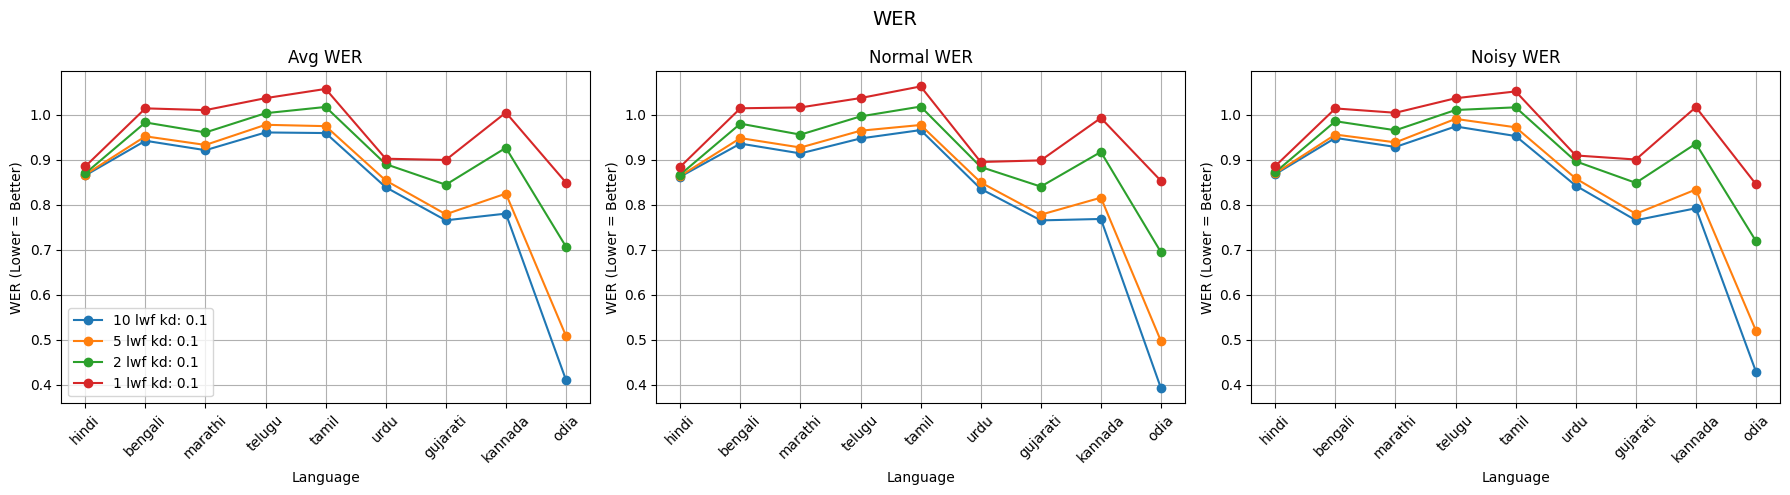

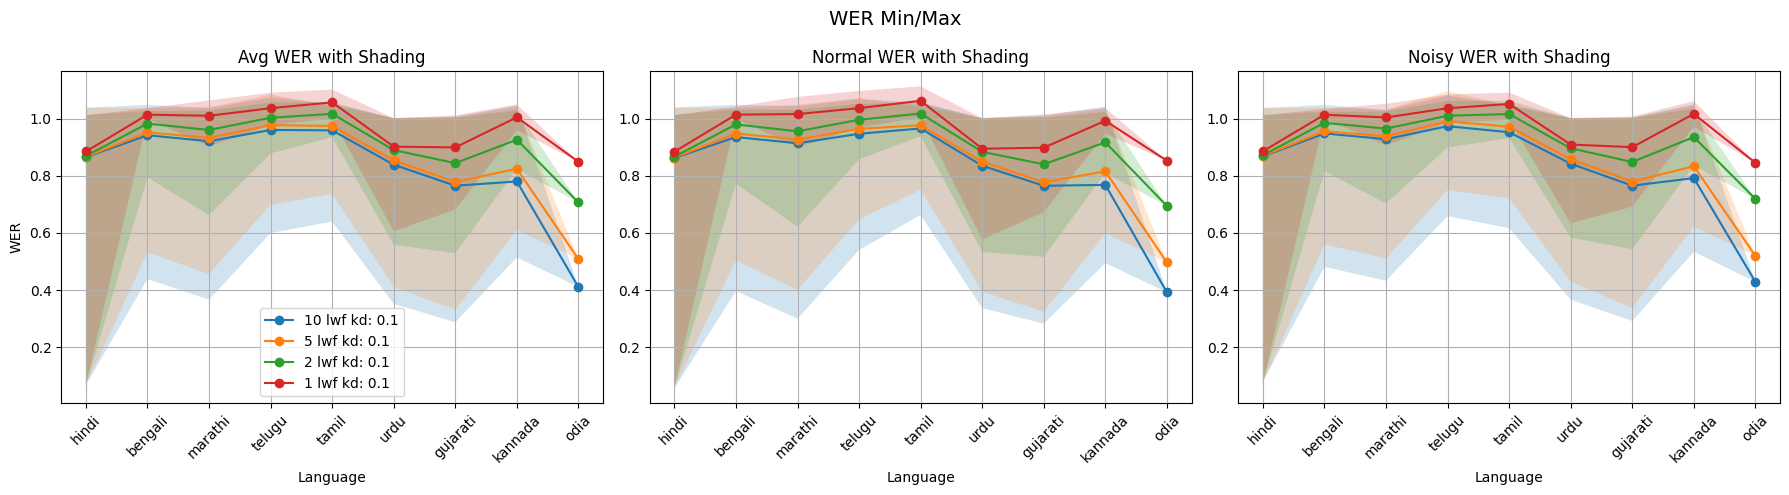

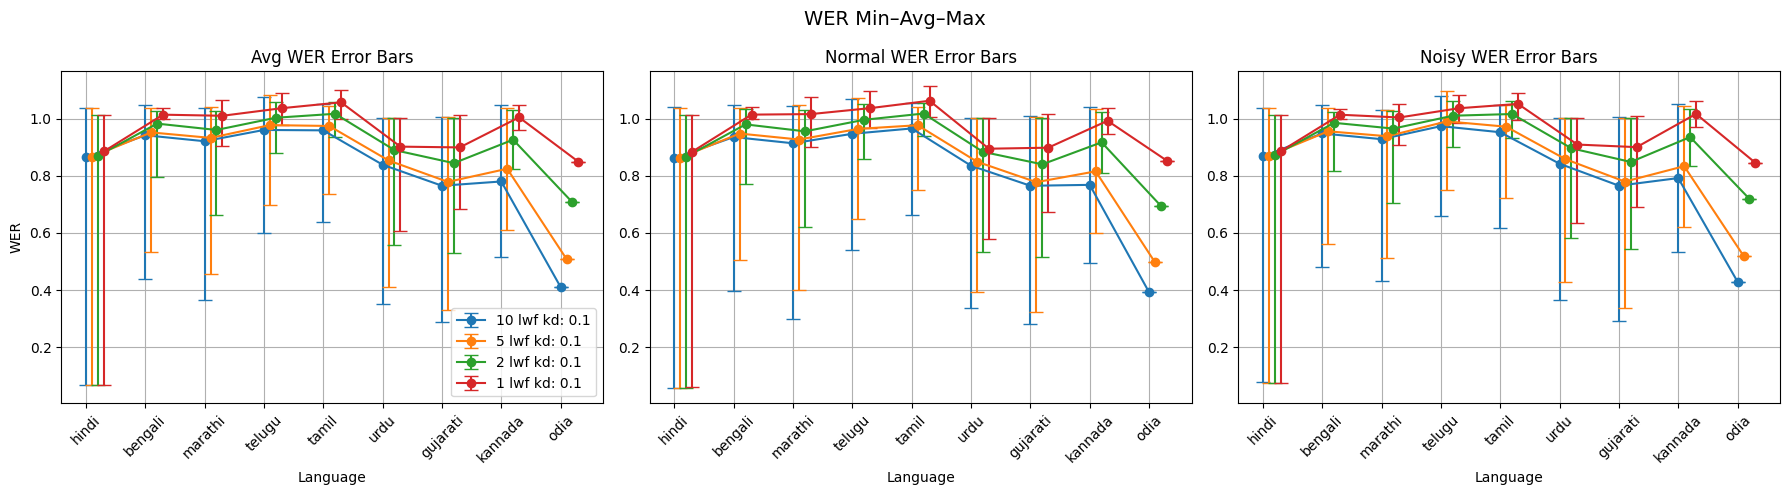

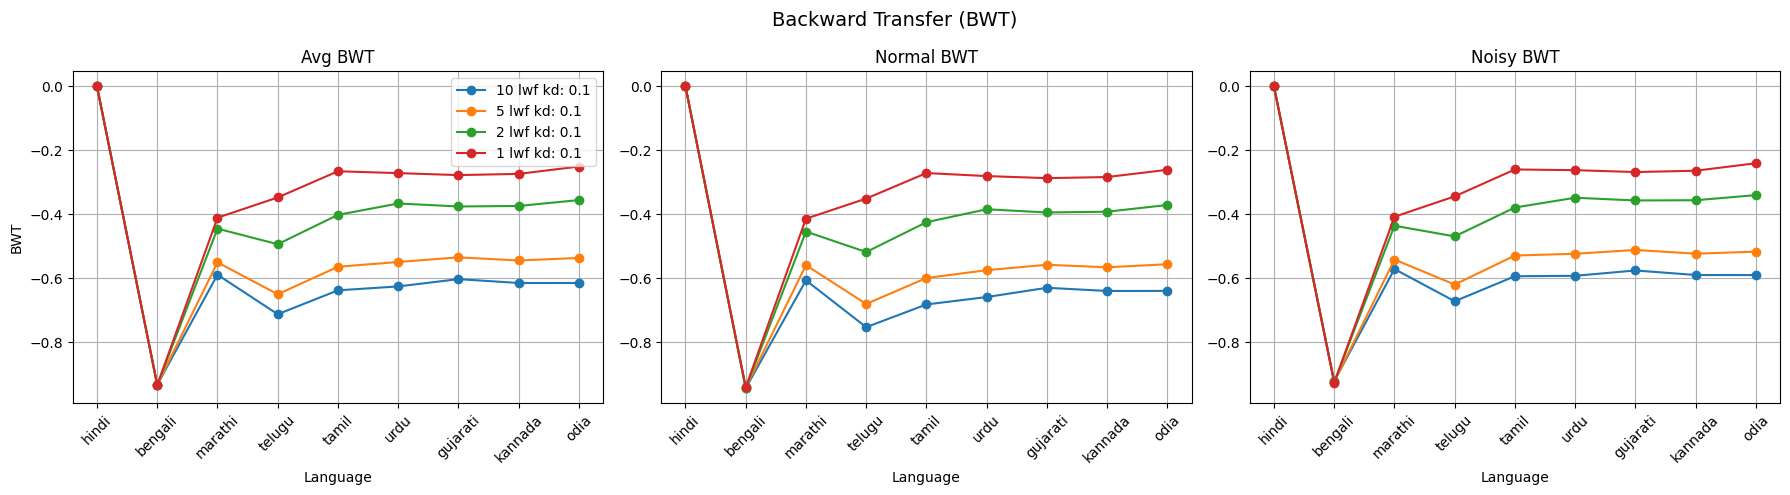

/tmp/ipykernel_7451/140548212.py:116: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab10', num_runs)
/tmp/ipykernel_7451/140548212.py:116: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab10', num_runs)
/tmp/ipykernel_7451/140548212.py:116: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab10', num_runs)


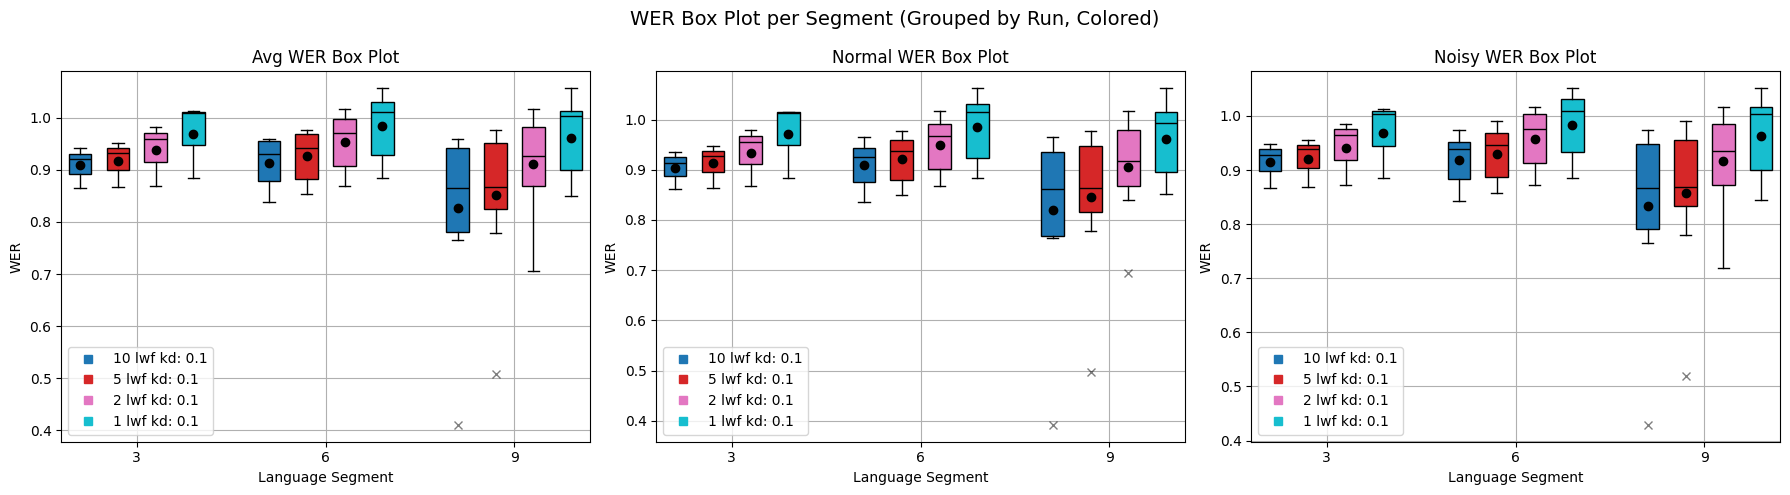

In [60]:
mode = "ctc"
updated_plot_stats(wandb_notes_selected, mode, metrics = ["avg", "", "noisy"])

In [ ]:
temp = ["lwf",  "naive"]
wandb_notes_selected = return_keys_in_list(epoch_selected_runs[5], temp)

wandb_notes_selected = remove_epoch(wandb_notes_selected)

mode = "ctc"
updated_plot_stats(wandb_notes_selected, mode, metrics = ["avg", "", "noisy"])

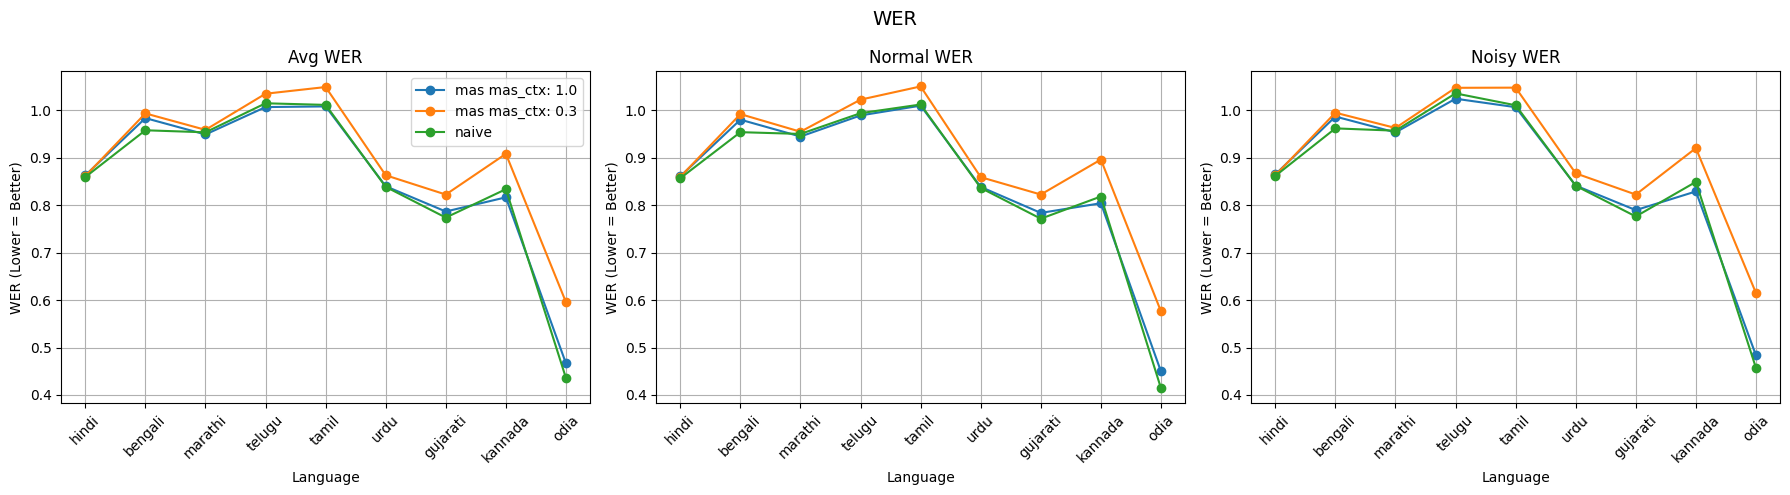

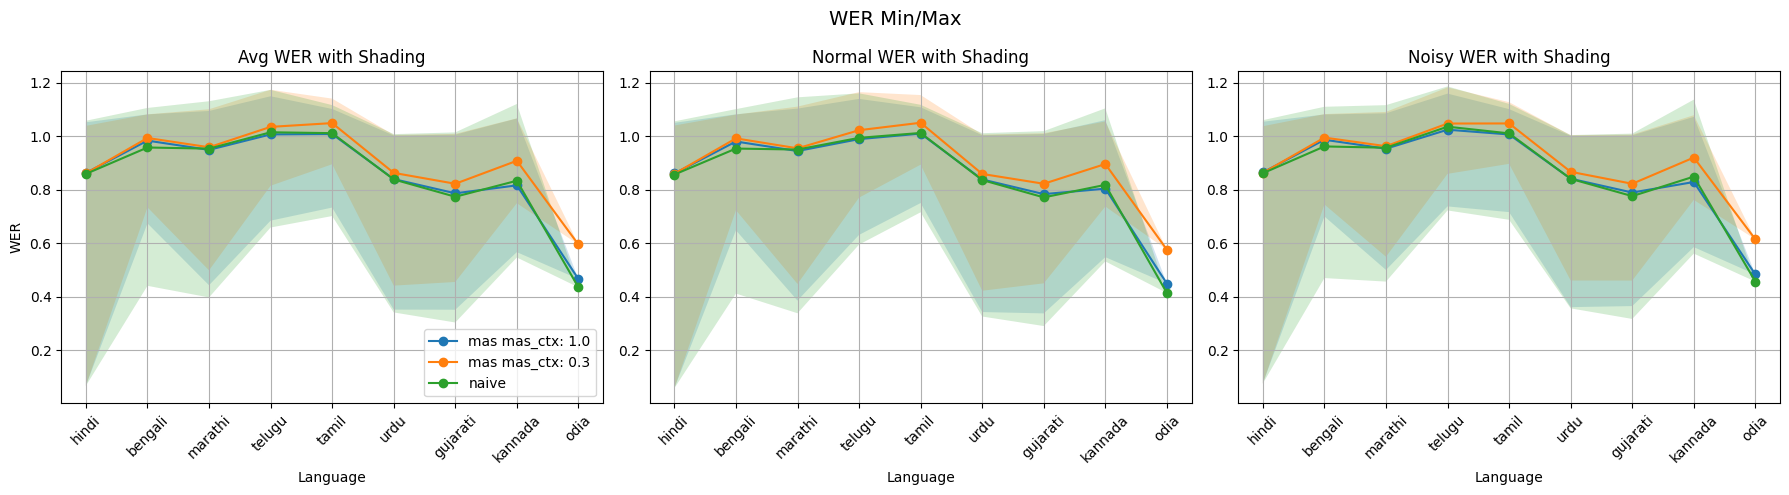

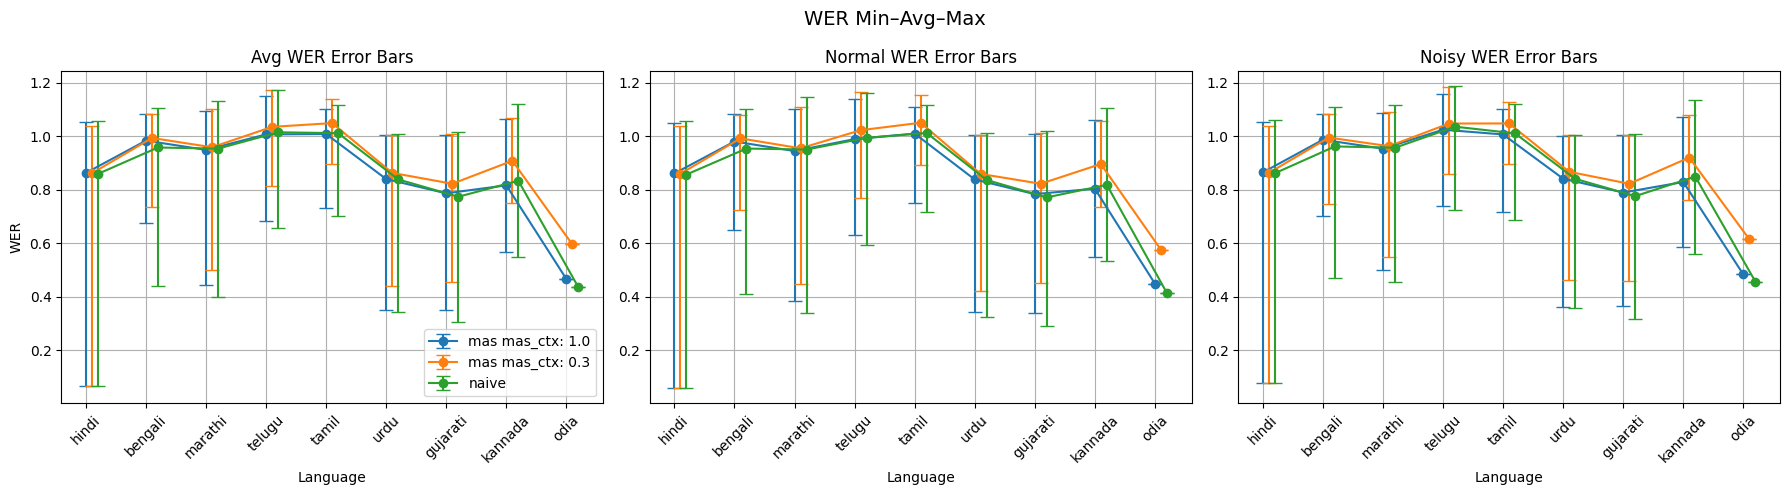

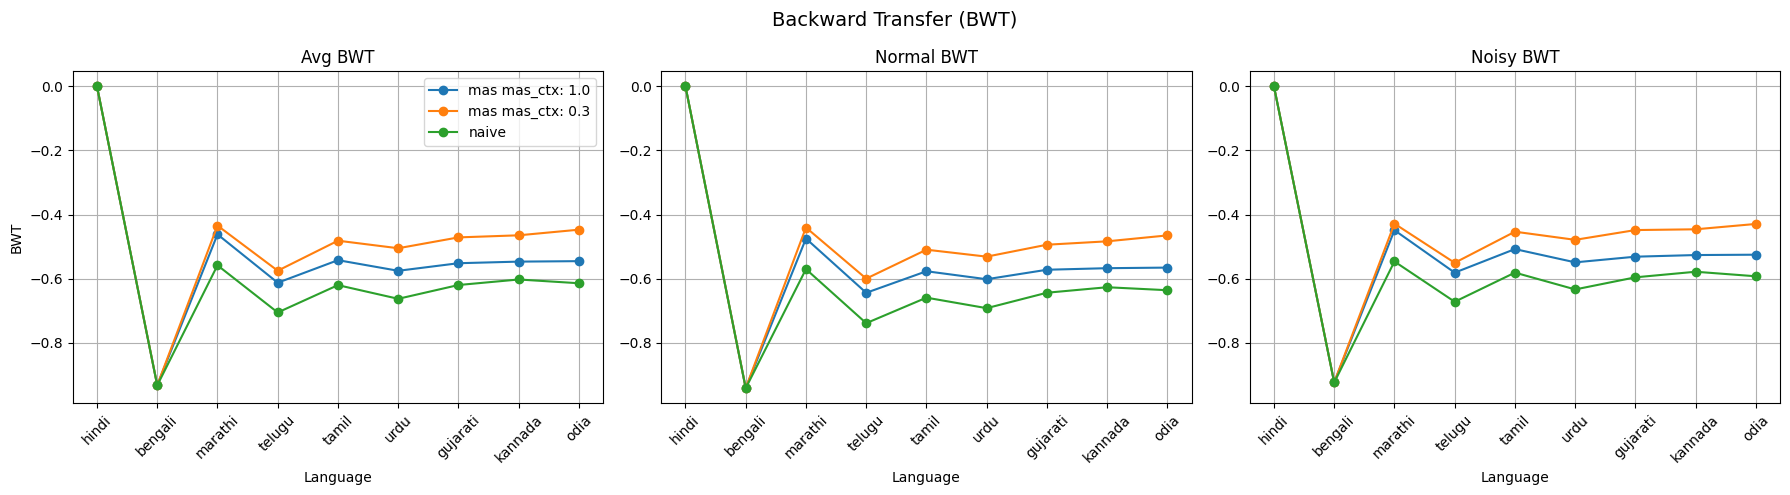

/tmp/ipykernel_7451/140548212.py:116: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab10', num_runs)
/tmp/ipykernel_7451/140548212.py:116: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab10', num_runs)
/tmp/ipykernel_7451/140548212.py:116: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab10', num_runs)


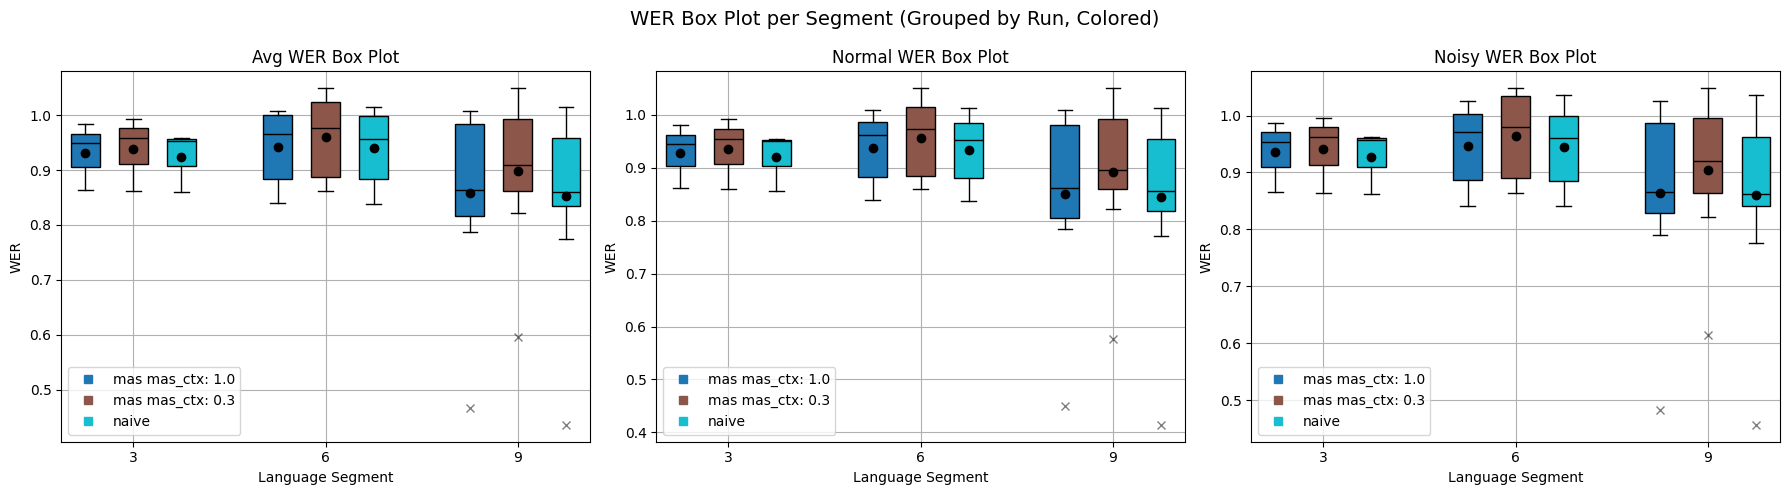

In [27]:
# wandb_notes_selected = cl_selected_runs["ewc"]
# Median (black line)

# Mean (red circle)

# Whiskers extending to min/max within 1.5 IQR

# Outliers, if any, marked as gray



temp = ["mas",  "naive"]
wandb_notes_selected = return_keys_in_list(epoch_selected_runs[5], temp)

wandb_notes_selected = remove_epoch(wandb_notes_selected)

mode = "ctc"
updated_plot_stats(wandb_notes_selected, mode, metrics = ["avg", "", "noisy"])

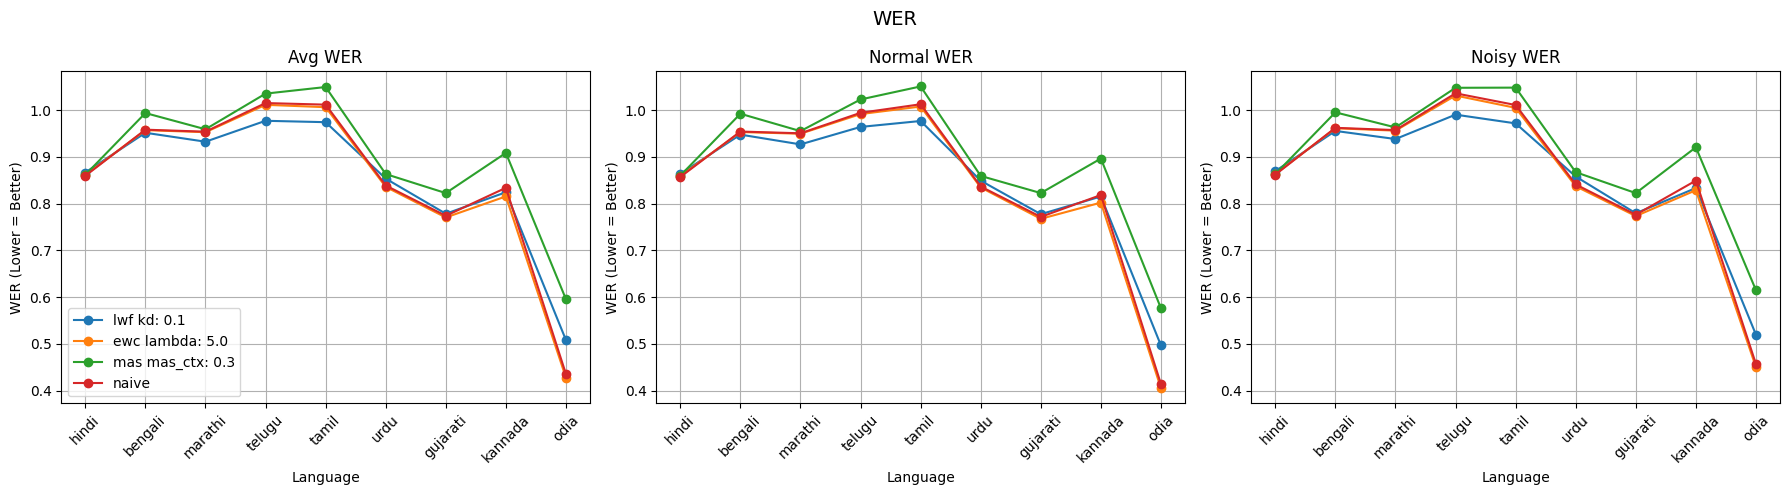

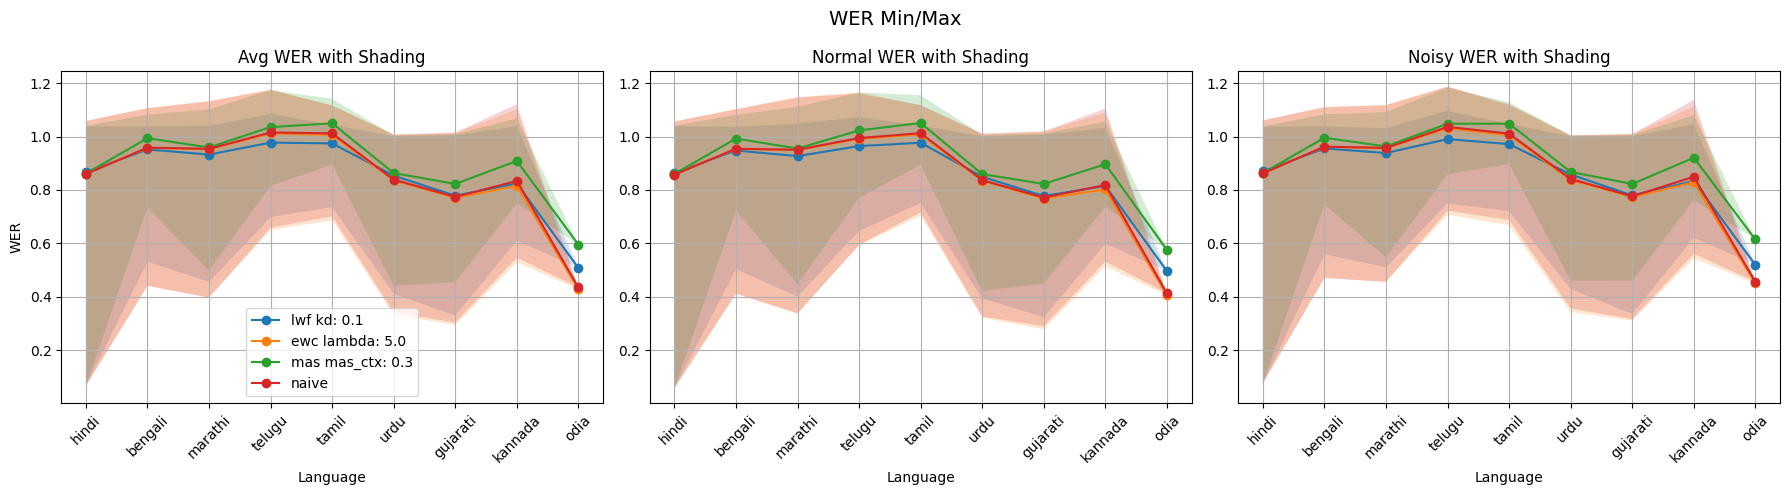

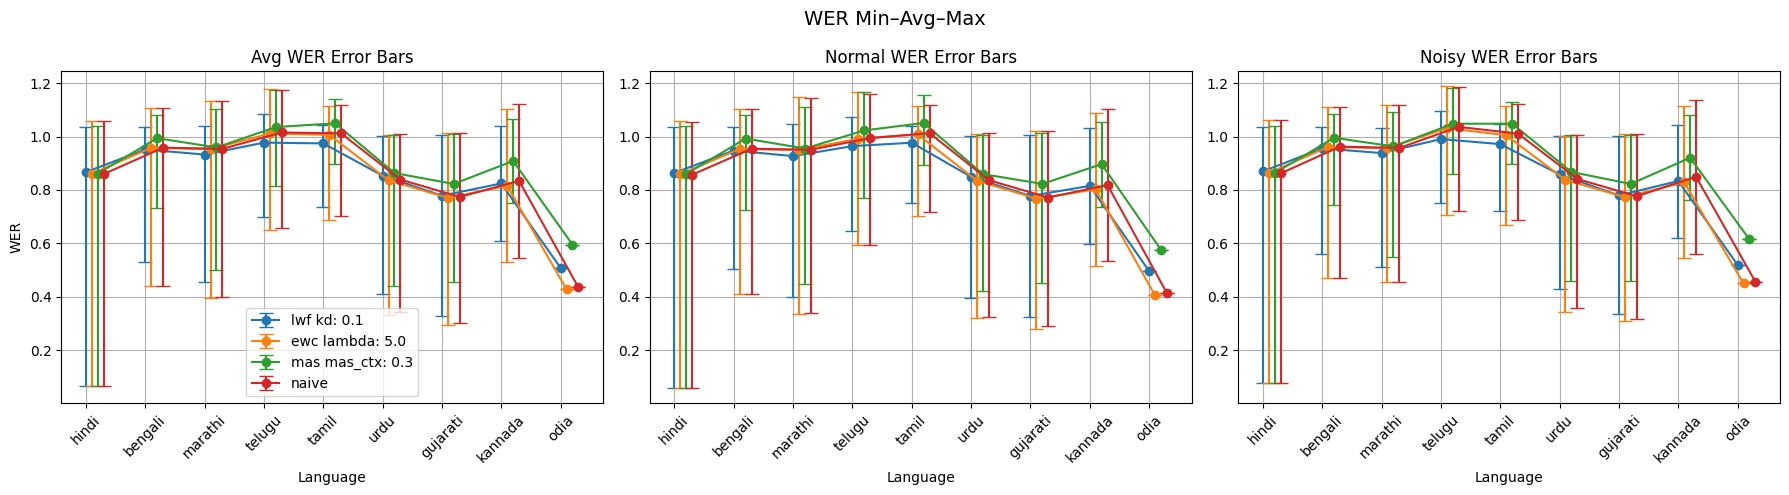

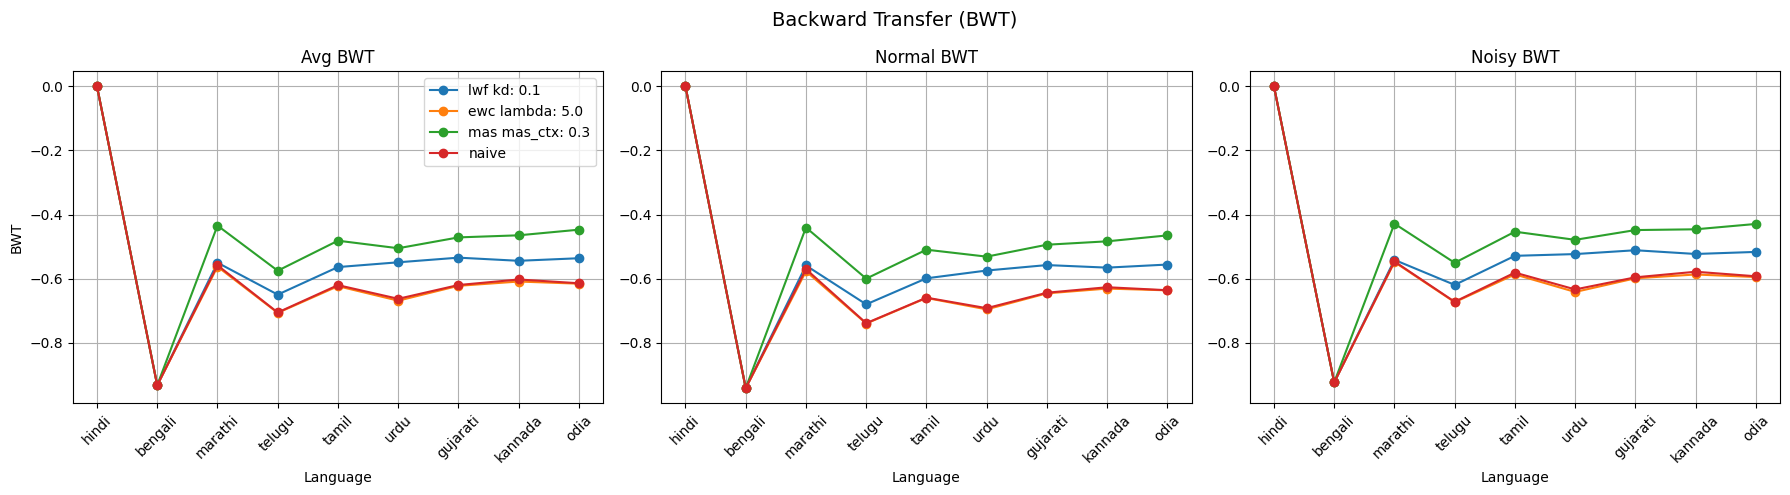

/tmp/ipykernel_7451/140548212.py:116: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab10', num_runs)
/tmp/ipykernel_7451/140548212.py:116: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab10', num_runs)
/tmp/ipykernel_7451/140548212.py:116: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab10', num_runs)


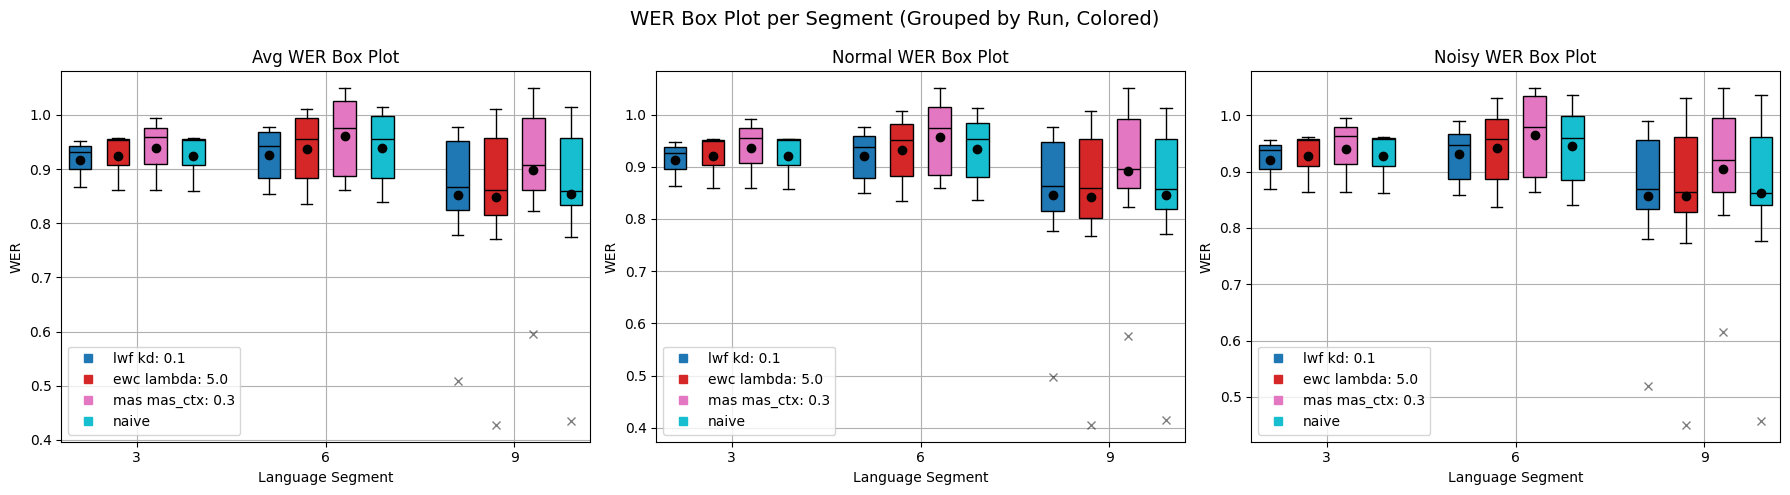

In [28]:
wandb_notes_selected = return_keys_in_list(epoch_selected_runs[5], default)
mode = "ctc"

wandb_notes_selected = remove_epoch(wandb_notes_selected)
updated_plot_stats(wandb_notes_selected, mode, metrics = ["avg", "", "noisy"])

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Compute scores for both modes
mode_ctc = "ctc"
bwt_ctc, avg_ctc, min_ctc, max_ctc = calc_scores(wandb_notes, mode_ctc, mode="")
bwt_ctc_noisy, avg_ctc_noisy, min_ctc_noisy, max_ctc_noisy = calc_scores(wandb_notes, mode_ctc, metric="noisy")
bwt_ctc_avg, avg_ctc_avg, min_ctc_avg, max_ctc_avg = calc_scores(wandb_notes, mode_ctc, metric="avg")

mode_rnnt = "rnnt"
bwt_rnnt, avg_rnnt, min_rnnt, max_rnnt = calc_scores(wandb_notes, mode_rnnt, mode="")
bwt_rnnt_noisy, avg_rnnt_noisy, min_rnnt_noisy, max_rnnt_noisy = calc_scores(wandb_notes, mode_rnnt, metric="noisy")
bwt_rnnt_avg, avg_rnnt_avg, min_rnnt_avg, max_rnnt_avg = calc_scores(wandb_notes, mode_rnnt, metric="avg")


# Step 2: Build merged rows
table_rows = []
langs = list(next(iter(avg_ctc.values())).keys())  # Assume all langs same across runs

for run_name, desc in wandb_notes_selected.items():
    for lang in langs:
        row = {
            "Run": desc,
            "Language": lang,
            "Avg WER (CTC)": avg_ctc[run_name][lang],
            "Avg WER (RNNT)": avg_rnnt[run_name][lang],
            # "Min WER (CTC)": min_ctc[run_name][lang],
            # "Min WER (RNNT)": min_rnnt[run_name][lang],
            # "Max WER (CTC)": max_ctc[run_name][lang],
            # "Max WER (RNNT)": max_rnnt[run_name][lang],
            "BWT (CTC)": bwt_ctc[run_name][lang],
            "BWT (RNNT)": bwt_rnnt[run_name][lang],
        }
        table_rows.append(row)

# Step 3: Create and sort DataFrame
summary_df = pd.DataFrame(table_rows)
summary_df = summary_df.sort_values(by=["Run", "Language"]).reset_index(drop=True)

# Step 4: Plot the table
fig, ax = plt.subplots(figsize=(16, len(summary_df) * 0.4))
ax.axis("off")
tbl = plt.table(
    cellText=summary_df.values,
    colLabels=summary_df.columns,
    cellLoc="center",
    loc="center"
)
tbl.auto_set_font_size(False)
tbl.set_fontsize(9)
tbl.scale(1.2, 1.2)

plt.title("CTC vs RNNT — WER Metrics and BWT per Run and Language", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


TypeError: calc_scores() got multiple values for argument 'mode'